In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import quandl
import functools
import time
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
import seaborn as sn
plt.style.use('seaborn')

In [2]:
@functools.lru_cache(maxsize=16)
def fetch_quandl(my_securities,sdate,edate):
    qdata = quandl.get(list(my_securities), returns="pandas",authtoken='MgKeNNH7rTeBnh4t1667',start_date=sdate, end_date=edate)
    return qdata

In [763]:
def clean_up(df):
    df=df.copy()
    col_list,ticks=[],[]
    for col in df.columns:
        if "Not Found" in col:
            continue        
        else:
            col_list.append(col)
            a,b=col.split(" - ")
            a,b=a.split("_"+b)
            a,b=a.split("/")
            ticks.append(b)
    df=df[col_list]
    df.columns=ticks
    return df

In [764]:
sdate,edate="2011-01-01","2018-01-01"

###  Ticker List from Quandl Page with Active Flag, Exchange, and Sector Code
    - I've already filtered companies belonging to the automotive sector (5) and financial industry (13)
    - Apart from this we have only considered stocks listed on NYSE and NASDAQ
    - Finally only considered securities who have the Active Flag as Yes

In [765]:
tic_list = (pd.DataFrame.from_csv('EOD tickers.csv').index)

In [766]:
print("Count of tickers is: ",len(tic_list))

Count of tickers is:  3788


###  Creating list to pull ticker data from Quandl for the three ratios

In [767]:
tickers_debt_to_equity = []
for x in tic_list: tickers_debt_to_equity.append('ZFB/'+x+'_TOT_DEBT_TOT_EQUITY_Q')
tickers_price_to_book = []
for x in tic_list: tickers_price_to_book.append('ZFB/'+x+'_BOOK_VAL_PER_SHARE_Q')
tickers_price_to_earning = []
for x in tic_list: tickers_price_to_earning.append('ZFB/'+x+'_DILUTED_NET_EPS_Q')

######
debt_to_equity1 = fetch_quandl(tuple(tickers_debt_to_equity[0:1000]), "2011-01-01","2018-01-31")
debt_to_equity2 = fetch_quandl(tuple(tickers_debt_to_equity[1000:2000]), "2011-01-01","2018-01-31")
debt_to_equity3 = fetch_quandl(tuple(tickers_debt_to_equity[2000:3788]), "2011-01-01","2018-01-31")
debt_to_equity_df = pd.merge(debt_to_equity1,debt_to_equity2, how='left', on="PER_END_DATE")
debt_to_equity_df1 = pd.merge(debt_to_equity_df,debt_to_equity3, how='left', on="PER_END_DATE")
debt_to_equity_df1.to_csv("debt_to_equity__full.csv")

###### 
price_to_book1 = fetch_quandl(tuple(tickers_price_to_book[0:1000]), "2011-01-01","2018-01-31")
price_to_book2 = fetch_quandl(tuple(tickers_price_to_book[1000:2000]), "2011-01-01","2018-01-31")
price_to_book3 = fetch_quandl(tuple(tickers_price_to_book[2000:3788]), "2011-01-01","2018-01-31")
price_to_book_df = pd.merge(price_to_book1,price_to_book2, how='left', on="PER_END_DATE")
price_to_book_df1 = pd.merge(price_to_book_df,price_to_book3, how='left', on="PER_END_DATE")
price_to_book_df1.to_csv("price_to_book__full.csv")

###### 
price_to_earnings1 = fetch_quandl(tuple(tickers_price_to_earnings[0:1000]), "2011-01-01","2018-01-31")
price_to_earnings2 = fetch_quandl(tuple(tickers_price_to_earnings[1000:2000]), "2011-01-01","2018-01-31")
price_to_earnings3 = fetch_quandl(tuple(tickers_price_to_earnings[2000:3788]), "2011-01-01","2018-01-31")
price_to_earnings_df = pd.merge(price_to_earnings1,price_to_earnings2, how='left', on="PER_END_DATE")
price_to_earnings_df1 = pd.merge(price_to_earnings_df,price_to_earnings3, how='left', on="PER_END_DATE")
price_to_earnings_df1.to_csv("price_to_earnings__full.csv")

###  For our convinience I've saved the three ratio data tables in csv (attached with the submission)

###  Loading the Book_value CSV

In [769]:
price_to_book=pd.read_csv("price_to_book__full.csv").set_index("PER_END_DATE")
price_to_book=clean_up(price_to_book)
price_to_book.index.names=['Date']
price_to_book.index=pd.to_datetime(price_to_book.index)
price_to_book.head()

,A,AA,AAAP,AAC,AAL,AAN,AAOI,AAON,AAP,AAPL,...,ZS,ZSAN,ZTO,ZTS,ZUMZ,ZUO,ZVO,ZYME,ZYNE,ZYXI
Date,,,,,,,,,,,,,,,,,,,,,
2011-01-31,9.6783,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,7.3532,NaN,NaN,NaN,NaN,NaN
2011-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-03-31,NaN,NaN,NaN,NaN,-11.8424,12.7212,NaN,2.155,11.353,9.4979,...,NaN,NaN,NaN,NaN,NaN,NaN,5.4164,NaN,NaN,0.2666
2011-04-30,11.3822,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,7.4606,NaN,NaN,NaN,NaN,NaN
2011-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###  Loading the Debt_to_Equity Ratio CSV

In [770]:
debt_to_equity=pd.read_csv("debt_to_equity_full.csv").set_index("PER_END_DATE")
debt_to_equity=clean_up(debt_to_equity)
debt_to_equity.index.names=['Date']
debt_to_equity.index=pd.to_datetime(debt_to_equity.index)
debt_to_equity.head()

,A,AA,AAC,AAL,AAN,AAOI,AAON,AAP,AAPL,AAWW,...,ZNH,ZSAN,ZTO,ZTS,ZUMZ,ZUO,ZVO,ZYME,ZYNE,ZYXI
Date,,,,,,,,,,,,,,,,,,,,,
2011-01-31,0.6406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-03-31,NaN,NaN,NaN,-3.0686,0.0408,NaN,0.0637,0.4885,NaN,0.4479,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3324
2011-04-30,0.5413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###  Loading the Earnings_per_share CSV

In [771]:
price_to_earnings=pd.read_csv("price_to_earnings_full.csv").set_index("PER_END_DATE")
price_to_earnings=clean_up(price_to_earnings)
price_to_earnings.index.names=['Date']
price_to_earnings.index=pd.to_datetime(price_to_earnings.index)
price_to_earnings.head()


,A,AA,AAAP,AAC,AAL,AAN,AAOI,AAON,AAP,AAPL,...,ZS,ZSAN,ZTO,ZTS,ZUMZ,ZUO,ZVO,ZYME,ZYNE,ZYXI
Date,,,,,,,,,,,,,,,,,,,,,
2011-01-31,0.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.49,NaN,NaN,NaN,NaN,NaN
2011-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-03-31,NaN,NaN,NaN,NaN,NaN,0.55,NaN,0.0652,1.35,0.9143,...,NaN,NaN,NaN,NaN,NaN,NaN,0.92,NaN,NaN,0.0
2011-04-30,0.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.06,NaN,NaN,NaN,NaN,NaN
2011-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###  Now to filter down to the universe of Securities with the Ratio available, I check if they''ve reported these ratios 28 times, i.e. 4 qtr * 7 years

In [772]:
tickers_pb=[]
count=0
for col in price_to_book.columns:
    if(price_to_book[col].notna().sum()==28):
        tickers_pb.append(col)
print("For P/B ratio count of companies with the ratio for 28 weeks is :",len(tickers_pb))

For P/B ratio count of companies with the ratio for 28 weeks is : 1632


In [773]:
tickers_pe=[]
count=0
for col in price_to_earnings.columns:
    if(price_to_earnings[col].notna().sum()==28):
        tickers_pe.append(col)
print("For P/E ratio count of companies with the ratio for 28 weeks is :",len(tickers_pe))

For P/E ratio count of companies with the ratio for 28 weeks is : 1882


In [774]:
tickers_de=[]
for col in debt_to_equity.columns:
    if(debt_to_equity[col].notna().sum()==28 and debt_to_equity[col].max()>0.1):
        tickers_de.append(col)
print("For D/E ratio count of companies with the ratio for 28 weeks is :",len(debt_to_equity))

For D/E ratio count of companies with the ratio for 28 weeks is : 85


In [775]:
ticker_list=sorted(list(set.intersection(set(tickers_de),set(tickers_pe),set(tickers_pb))))
print("The common set of securities are :",len(ticker_list))

The common set of securities are : 1003


###  Pulling EOD Prices for the Following securities

###### 
tickers_EOD_prices = []
for x in list(ticker_list): tickers_EOD_prices.append('EOD/'+x)

######
EOD_Data=pd.DataFrame()
s_time=time.time()
for i in tickers_EOD_prices:
    a=(fetch_quandl((i,), "2011-01-01","2018-01-31")[i+" - Adj_Close"]).to_frame()
    EOD_Data=EOD_Data.join(a,how="outer")

e_time=time.time()
print(e_time-s_time)
EOD_Data=clean_up(EOD_Data)
EOD_Data=EOD_Data.dropna(axis=1)
EOD_Data.to_csv("EOD_Data_1.csv")

###  For our convinience I've saved the EOD Prices in a CSV (dropping the ones with any NA/Missing Prices)

In [776]:
EOD_Data=pd.read_csv("EOD_Data_1.csv").set_index("Date")
EOD_Data.index=pd.to_datetime(EOD_Data.index)
EOD_Data.head()

,AAN,AAP,AAWW,ABB,ABC,ABG,ABT,ACCO,ACHV,ACIW,...,XLNX,XOM,XOMA,XPO,XRX,YORW,YRCW,YUM,ZBH,ZEUS
Date,,,,,,,,,,,,,,,,,,,,,
2011-01-03,20.229723,64.276395,55.86,18.539833,30.198792,18.76,19.443806,8.520145,1851.299815,9.150000,...,24.196204,56.724035,106.0,10.52,25.736125,14.160706,1089.0,29.907338,51.521568,28.377350
2011-01-04,19.858536,61.077295,53.95,18.246068,29.864423,18.51,19.626778,8.481549,1829.299817,8.940000,...,24.294897,56.990345,146.1,10.20,25.054810,13.624192,1038.0,29.450412,50.837364,28.309670
2011-01-05,19.731551,61.155801,53.97,17.887022,30.321980,18.63,19.626778,8.539443,1875.499812,8.950000,...,24.377141,56.838168,133.4,10.48,25.186677,13.518516,1038.0,29.590536,50.874851,28.532048
2011-01-06,19.594797,59.144097,53.21,17.772780,30.673947,18.62,19.586118,8.134182,1899.699810,8.863333,...,24.788362,57.203393,135.6,10.56,25.186677,13.364065,1059.0,29.797676,49.300242,29.663274
2011-01-07,19.575261,60.724020,52.89,17.952303,30.735542,18.72,19.667439,8.008744,1885.399811,8.696667,...,24.648547,57.515356,116.6,10.56,24.835030,13.315291,1023.0,30.169309,49.290871,26.559653


In [777]:
ticker_list=EOD_Data.columns
price_to_earnings=(price_to_earnings[ticker_list])
debt_to_equity=debt_to_equity[ticker_list]
price_to_book=price_to_book[ticker_list]

##  Now Actually converting everything into a Ratio using Daily EOD Prices

### 1. P/B = Price / Book Value

In [778]:
pb_ratio=EOD_Data/(EOD_Data[[]].join(price_to_book).fillna(method="ffill")).fillna(method="bfill")
pb_ratio=pb_ratio.replace([np.inf, -np.inf], np.nan)
pb_ratio.head()

,AAN,AAP,AAWW,ABB,ABC,ABG,ABT,ACCO,ACHV,ACIW,...,XLNX,XOM,XOMA,XPO,XRX,YORW,YRCW,YUM,ZBH,ZEUS
Date,,,,,,,,,,,,,,,,,,,,,
2011-01-03,1.590237,5.661622,1.380961,2.551763,2.637403,2.010395,1.222581,-6.102819,3.945190,3.453482,...,2.651494,1.773762,6.464085,2.411959,0.692790,1.954792,-0.596826,7.513085,1.686842,1.137469
2011-01-04,1.561058,5.379837,1.333742,2.511330,2.608201,1.983604,1.234086,-6.075173,3.898307,3.374222,...,2.662309,1.782090,8.909460,2.338591,0.674450,1.880729,-0.568876,7.398300,1.664441,1.134756
2011-01-05,1.551076,5.386752,1.334237,2.461912,2.648162,1.996464,1.234086,-6.116642,3.996761,3.377996,...,2.671321,1.777331,8.134990,2.402788,0.678000,1.866141,-0.568876,7.433501,1.665669,1.143670
2011-01-06,1.540326,5.209557,1.315448,2.446188,2.678901,1.995392,1.231529,-5.826360,4.048332,3.345285,...,2.716384,1.788752,8.269150,2.421130,0.678000,1.844821,-0.580385,7.485537,1.614115,1.189014
2011-01-07,1.538790,5.348720,1.307537,2.470897,2.684280,2.006108,1.236642,-5.736511,4.017859,3.282380,...,2.701063,1.798507,7.110493,2.421130,0.668534,1.838088,-0.560655,7.578895,1.613808,1.064609


###  2. P/E = Price / EPS

In [779]:
pe_ratio=EOD_Data/(EOD_Data[[]].join(price_to_earnings).fillna(method="ffill")).fillna(method="bfill")
pe_ratio=pe_ratio.replace([np.inf, -np.inf], np.nan)
pe_ratio.head()

,AAN,AAP,AAWW,ABB,ABC,ABG,ABT,ACCO,ACHV,ACIW,...,XLNX,XOM,XOMA,XPO,XRX,YORW,YRCW,YUM,ZBH,ZEUS
Date,,,,,,,,,,,,,,,,,,,,,
2011-01-03,36.781315,47.612145,139.650,63.930459,39.219210,31.796610,35.352375,-56.800968,-54.285541,547.904192,...,41.010516,26.506558,-24.090909,87.666667,33.863322,83.298270,-1.679299,55.383959,47.705155,30.188670
2011-01-04,36.106429,45.242441,134.875,62.917476,38.784964,31.372881,35.685051,-56.543659,-53.640437,535.329341,...,41.177792,26.631002,-33.204545,85.000000,32.966855,80.142308,-1.600654,54.537799,47.071633,30.116670
2011-01-05,35.875546,45.300593,134.925,61.679386,39.379195,31.576271,35.685051,-56.929623,-54.995156,535.928144,...,41.317189,26.559892,-30.318182,87.333333,33.140364,79.520679,-1.600654,54.797288,47.106344,30.353242
2011-01-06,35.626904,43.810442,133.025,61.285448,39.836295,31.559322,35.611123,-54.227878,-55.704771,530.738523,...,42.014172,26.730558,-30.818182,88.000000,33.140364,78.612145,-1.633037,55.180881,45.648372,31.556675
2011-01-07,35.591384,44.980756,132.225,61.904493,39.916288,31.728814,35.758979,-53.391624,-55.285453,520.758483,...,41.777198,26.876335,-26.500000,88.000000,32.677672,78.325239,-1.577523,55.869090,45.639696,28.254950


### 3. D/E = Debt / (no. of shares * Prices)
    So to making a daily ratio, we first multiply by the prices to get Debt/ No of Shares, then ffill and bfill and divide by Prices

In [780]:
de_ratio=((EOD_Data[[]].join(debt_to_equity)*EOD_Data).fillna(method="ffill")).fillna(method="bfill")/EOD_Data
de_ratio.head()

,AAN,AAP,AAWW,ABB,ABC,ABG,ABT,ACCO,ACHV,ACIW,...,XLNX,XOM,XOMA,XPO,XRX,YORW,YRCW,YUM,ZBH,ZEUS
Date,,,,,,,,,,,,,,,,,,,,,
2011-01-03,0.049990,0.489844,0.559033,0.148419,0.495397,2.931197,0.782801,-10.211906,0.169818,0.337320,...,0.413371,0.114356,0.570739,0.083510,0.604113,0.931198,-1.858924,2.030413,0.214063,0.332927
2011-01-04,0.050924,0.515501,0.578825,0.150809,0.500944,2.970787,0.775503,-10.258376,0.171860,0.345244,...,0.411692,0.113822,0.414089,0.086130,0.620540,0.967868,-1.950258,2.061915,0.216944,0.333723
2011-01-05,0.051252,0.514840,0.578610,0.153836,0.493385,2.951651,0.775503,-10.188828,0.167627,0.344858,...,0.410303,0.114127,0.453511,0.083829,0.617291,0.975435,-1.950258,2.052151,0.216784,0.331122
2011-01-06,0.051610,0.532351,0.586874,0.154825,0.487723,2.953236,0.777113,-10.696456,0.165492,0.348230,...,0.403496,0.113398,0.446153,0.083194,0.617291,0.986708,-1.911585,2.037885,0.223708,0.318494
2011-01-07,0.051661,0.518500,0.590425,0.153277,0.486746,2.937460,0.773900,-10.863991,0.166747,0.354904,...,0.405785,0.112783,0.518854,0.083194,0.626032,0.990322,-1.978855,2.012782,0.223750,0.355712


###  4. Creating a Combination of P/B and P/E ratio
    As we just can't add the two ratio's together, We are  calculating the Z-scores of both ratios and then adding them up in the new data frame pb_pe_combination

In [781]:
a=pb_ratio
b=pe_ratio

In [782]:
for i in range(0,b.shape[1]):
    b.iloc[:,i]=(b.iloc[:,i]-pe_ratio.mean(axis=1))/pe_ratio.std(axis=1)
    a.iloc[:,i]=(a.iloc[:,i]-pb_ratio.mean(axis=1))/pb_ratio.std(axis=1)

In [783]:
pb_pe_combination=0.50*(a+b)
pb_pe_combination.head()

,AAN,AAP,AAWW,ABB,ABC,ABG,ABT,ACCO,ACHV,ACIW,...,XLNX,XOM,XOMA,XPO,XRX,YORW,YRCW,YUM,ZBH,ZEUS
Date,,,,,,,,,,,,,,,,,,,,,
2011-01-03,-0.061944,-0.033703,0.185044,0.004287,-0.054815,-0.072859,-0.064661,-0.289590,-0.278414,1.166599,...,4.150913,2.716152,-0.780359,8.620411,3.708580,9.621715,-0.516189,9.256137,7.632174,5.339631
2011-01-04,-0.062305,-0.038029,0.177286,0.003765,-0.054543,-0.072747,-0.062607,-0.290018,-0.277857,1.150059,...,4.203871,2.755371,-1.071898,8.522830,3.669519,9.403671,-0.499291,9.153796,7.551041,5.329053
2011-01-05,-0.062470,-0.037946,0.173425,-0.000026,-0.052865,-0.071679,-0.062214,-0.286409,-0.276716,1.129758,...,4.206074,2.739482,-0.979890,8.702114,3.690689,9.334920,-0.498062,9.175361,7.540983,5.359490
2011-01-06,-0.063218,-0.041558,0.170272,-0.000711,-0.051834,-0.071931,-0.062548,-0.281492,-0.279930,1.125060,...,4.276798,2.758614,-0.995393,8.778150,3.705966,9.266358,-0.505797,9.249024,7.326104,5.559235
2011-01-07,-0.062989,-0.038180,0.169827,0.001438,-0.051246,-0.071235,-0.061872,-0.280321,-0.279662,1.107294,...,4.287334,2.798072,-0.876961,8.815492,3.673233,9.278424,-0.495097,9.420419,7.398556,5.021993


###  We are assuming we trade on a monthly basis, thus enter a position Start of the Month and Exit the Position at the End of the Month
    Note we begin trading starting from Feb 2011, as we need 1 month data to calculate the Beta Hedge

In [784]:
month_start=(EOD_Data[[]].assign(date=EOD_Data[[]].index).resample("BMS").first().values.flatten())[1:]
print(month_start.shape)
month_end=EOD_Data[[]].assign(date=EOD_Data[[]].index).resample("M").last().values.flatten()[1:]
print(month_end.shape)

(84,)
(84,)


In [785]:
#function to return sorted(ascending values) of z-score to determine over/under priced securities
def z_score(df):
    df=df.copy(True)
    mu=df.mean()
    std=df.std()
    z=(df-mu)/std
    z=z.sort_values().dropna()
    return z

###  An example for using z-scores

In [786]:
stocks=z_score(pe_ratio.loc[month_start[0]])

In [787]:
#Buy the most undervalued stocks, least z-scores
stocks[0:5]#buy

POOL   -6.621064
SLAB   -6.269456
X      -5.021946
ST     -4.850088
SPWR   -4.744911
Name: 2011-02-01 00:00:00, dtype: float64

In [788]:
#Sell the most overvalued stocks, highest z-scores
stocks[-5:]

XPO     6.140610
YORW    6.418475
WSO     6.491831
RPM     6.954809
WLL     7.834627
Name: 2011-02-01 00:00:00, dtype: float64

### Getting SPY Data from EOD

In [789]:
spy=fetch_quandl(("EOD/SPY",),'2011-01-01','2018-01-31')["EOD/SPY - Adj_Low"]

###  Calculating Monthly SPY Returns at Month End Dates

In [790]:
spy.pct_change(22).loc[month_end].head()

Date
2011-02-28    0.024375
2011-03-31    0.016298
2011-04-29    0.042472
2011-05-31   -0.011594
2011-06-30   -0.018559
Name: EOD/SPY - Adj_Low, dtype: float64

In [791]:
def quantile_trading(prices,criteria,month_start,month_end,sizing):
    prices=prices.copy()
    criteria=criteria.copy()
    month_start=month_start.copy()
    month_end=month_end.copy()
    
    df=EOD_Data[[]]
    df['SS_Cash']=0.0
    df["SS_MV"]=0.0
    df['LB_Cash']=0.0
    df["LB_MV"]=0.0
    position=False
    for date in prices.index.values:
        if date in month_start:
            qty_bought,qty_sold=0.0,0.0
            z=z_score(criteria.loc[date])
            n=int(len(z)/10.0)
            #n=10
            if(sizing==True):
                w_sells=np.array([2*i/((n+1)) for i in range(1,n+1)])
                w_buys=np.flip(w_sells)
            else:
                w_sells,w_buys=np.ones(n),np.ones(n)
            
            sells=z[-n:].index
            buys=z[:n].index
            qty_bought= w_buys/prices.loc[date,buys]
            qty_sold= w_sells/prices.loc[date,sells]
            df.at[date,'SS_Cash']=+sum(qty_sold*prices.loc[date,sells])
            df.at[date,'LB_Cash']=-sum(qty_bought*prices.loc[date,buys])
            df.at[date,'SS_MV']=-sum(qty_sold*prices.loc[date,sells])
            df.at[date,'LB_MV']=sum(qty_bought*prices.loc[date,buys])
            position=True

        elif date in month_end:
            df.at[date,'SS_Cash']=-sum(qty_sold*prices.loc[date,sells])
            df.at[date,'LB_Cash']=sum(qty_bought*prices.loc[date,buys])
            position=False
            qty_bought,qty_sold=0.0,0.0


        elif position==True:
            df.at[date,'SS_MV']=-sum(qty_sold*prices.loc[date,sells])
            df.at[date,'LB_MV']=sum(qty_bought*prices.loc[date,buys])

    return df.iloc[19:]    
        

### Simple Quantile Trading Based on Ratio

In [792]:
o1=quantile_trading(EOD_Data,pe_ratio,month_start,month_end,False)
o2=quantile_trading(EOD_Data,pb_ratio,month_start,month_end,False)
o3=quantile_trading(EOD_Data,de_ratio,month_start,month_end,False)
o4=quantile_trading(EOD_Data,pb_pe_combination,month_start,month_end,False)

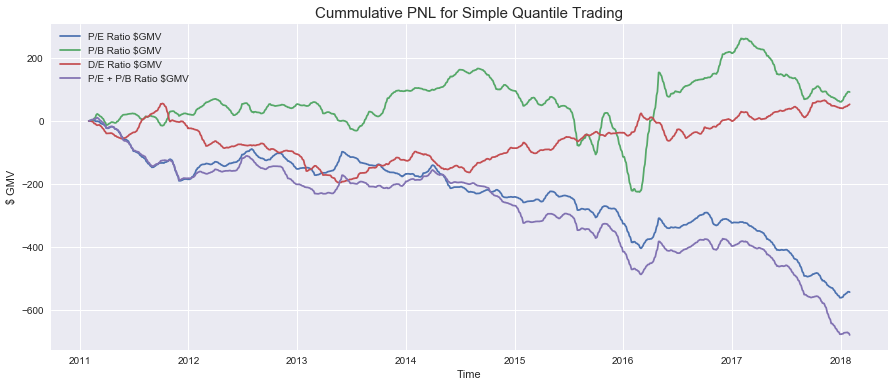

In [793]:
plt.subplots(figsize=(15,6))
plt.plot((o1.SS_Cash+o1.SS_MV+o1.LB_Cash+o1.LB_MV).cumsum(),label="P/E Ratio $GMV")
plt.plot((o2.SS_Cash+o2.SS_MV+o2.LB_Cash+o2.LB_MV).cumsum(),label="P/B Ratio $GMV")
plt.plot((o3.SS_Cash+o3.SS_MV+o3.LB_Cash+o3.LB_MV).cumsum(),label="D/E Ratio $GMV")
plt.plot((o4.SS_Cash+o4.SS_MV+o4.LB_Cash+o4.LB_MV).cumsum(),label="P/E + P/B Ratio $GMV")
plt.xlabel("Time")
plt.ylabel("$ GMV")
plt.title("Cummulative PNL for Simple Quantile Trading",size=15)
plt.legend()
plt.show()

###  Simple Quantile Trading Based on Ratio with Sizing Effect

In [796]:
o1_s=quantile_trading(EOD_Data,pe_ratio,month_start,month_end,True)
o2_s=quantile_trading(EOD_Data,pb_ratio,month_start,month_end,True)
o3_s=quantile_trading(EOD_Data,de_ratio,month_start,month_end,True)
o4_s=quantile_trading(EOD_Data,pb_pe_combination,month_start,month_end,True)

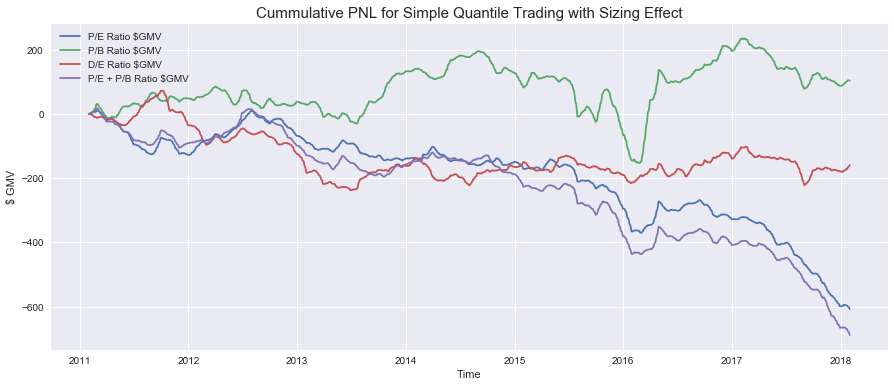

In [797]:
plt.subplots(figsize=(15,6))
plt.plot((o1_s.SS_Cash+o1_s.SS_MV+o1_s.LB_Cash+o1_s.LB_MV).cumsum(),label="P/E Ratio $GMV")
plt.plot((o2_s.SS_Cash+o2_s.SS_MV+o2_s.LB_Cash+o2_s.LB_MV).cumsum(),label="P/B Ratio $GMV")
plt.plot((o3_s.SS_Cash+o3_s.SS_MV+o3_s.LB_Cash+o3_s.LB_MV).cumsum(),label="D/E Ratio $GMV")
plt.plot((o4_s.SS_Cash+o4_s.SS_MV+o4_s.LB_Cash+o4_s.LB_MV).cumsum(),label="P/E + P/B Ratio $GMV")
plt.xlabel("Time")
plt.ylabel("$ GMV")
plt.title("Cummulative PNL for Simple Quantile Trading with Sizing Effect",size=15)
plt.legend()
plt.show()

### Function to Graph

In [799]:
def get_graph(df1,df2,s):
    df1=df1.copy()
    df2=df2.copy()
    print("=======================Without sizing effect=======================\n")
    print("Total $PNL 2011-2018 :%.2f"%(df1.loc[month_end,"SS_Cash"]+df1.loc[month_end,"LB_Cash"]).sum())
    print("Maximum $PNL in a month :%.2f"%(df1.loc[month_end,"SS_Cash"]+df1.loc[month_end,"LB_Cash"]).max())
    print("Maximum $Loss in a month :%.2f"%(df1.loc[month_end,"SS_Cash"]+df1.loc[month_end,"LB_Cash"]).min())
    print("\n=======================With sizing effect=======================\n")
    print("Total $PNL 2011-2018 :%.2f"%(df2.loc[month_end,"SS_Cash"]+df2.loc[month_end,"LB_Cash"]).sum())
    print("Maximum $PNL in a month :%.2f"%(df2.loc[month_end,"SS_Cash"]+df2.loc[month_end,"LB_Cash"]).max())
    print("Maximum $Loss in a month :%.2f"%(df2.loc[month_end,"SS_Cash"]+df2.loc[month_end,"LB_Cash"]).min())
    
    plt.figure(figsize=(16,5))
    plt.subplot(121)
    sn.distplot(df1.loc[month_end,"SS_Cash"]+df1.loc[month_end,"LB_Cash"],label="$PNL")
    plt.legend()
    plt.title("Distribution of PNL w/o sizing for {}".format(s),size=12)
    
    plt.subplot(122)
    sn.distplot(df2.loc[month_end,"SS_Cash"]+df2.loc[month_end,"LB_Cash"],label="$PNL")
    plt.legend()
    plt.title("Distribution of PNL w sizing for {}".format(s),size=12)
    plt.show()
    plt.close()
    
    r_mean=sum(df1.loc[month_end,"SS_Cash"]+df1.loc[month_end,"LB_Cash"])/(len(month_end))

    plt.subplots(figsize=(16,5))
    plt.bar(month_end,df1.loc[month_end,"SS_Cash"]+df1.loc[month_end,"LB_Cash"],width=20,label="Monthly $Pnl")
    plt.axhline(y=r_mean,linestyle="--",label="Mean Return =${:.2f}".format(r_mean))
    plt.bar(month_end,spy.pct_change(20).loc[month_end]*100,width=5,label="SPY % Monthly Return")
    plt.ylabel("$ PNL")
    plt.xlabel("Time")
    plt.title("Monthly Pnl w/o sizing for {}".format(s),size=12)
    plt.legend()
    plt.grid(linestyle=":")
    plt.show()
    
    r_mean=sum(df2.loc[month_end,"SS_Cash"]+df2.loc[month_end,"LB_Cash"])/(len(month_end))

    plt.subplots(figsize=(16,5))
    plt.bar(month_end,df2.loc[month_end,"SS_Cash"]+df2.loc[month_end,"LB_Cash"],width=20,label="Monthly $Pnl")
    plt.axhline(y=r_mean,linestyle="--",label="Mean Return =${:.2f}".format(r_mean))
    plt.bar(month_end,spy.pct_change(20).loc[month_end]*100,width=5,label="SPY % Monthly Return")
    plt.ylabel("$ PNL")
    plt.xlabel("Time")
    plt.title("Monthly Pnl w sizing for {}".format(s),size=12)
    plt.legend()
    plt.grid(linestyle=":")
    plt.show()
    

###  P/E Ratio

=======================Without sizing effect=======================

Total $PNL 2011-2018 :-47.20
Maximum $PNL in a month :5.48
Maximum $Loss in a month :-6.64

=======================With sizing effect=======================

Total $PNL 2011-2018 :-43.72
Maximum $PNL in a month :5.55
Maximum $Loss in a month :-5.63


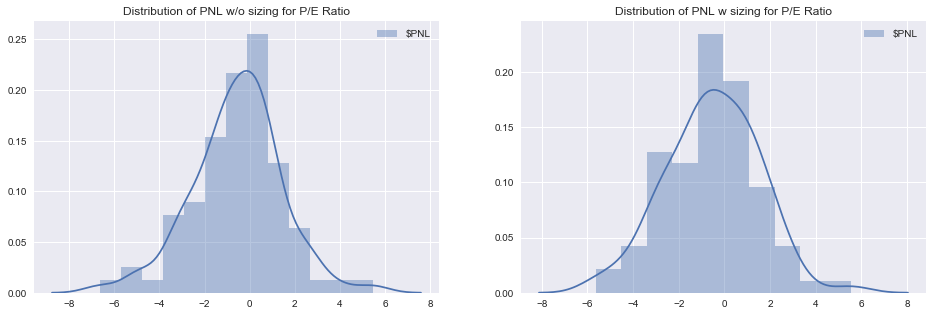

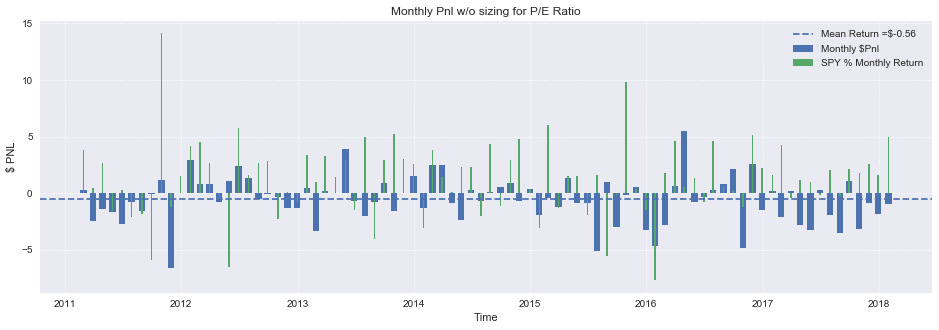

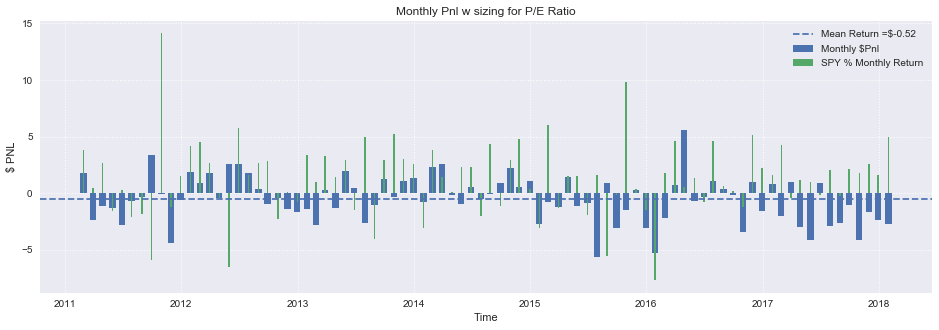

In [800]:
get_graph(o1,o1_s,"P/E Ratio")

###  P/B Ratio

=======================Without sizing effect=======================

Total $PNL 2011-2018 :9.87
Maximum $PNL in a month :16.54
Maximum $Loss in a month :-9.75

=======================With sizing effect=======================

Total $PNL 2011-2018 :16.08
Maximum $PNL in a month :10.98
Maximum $Loss in a month :-9.99


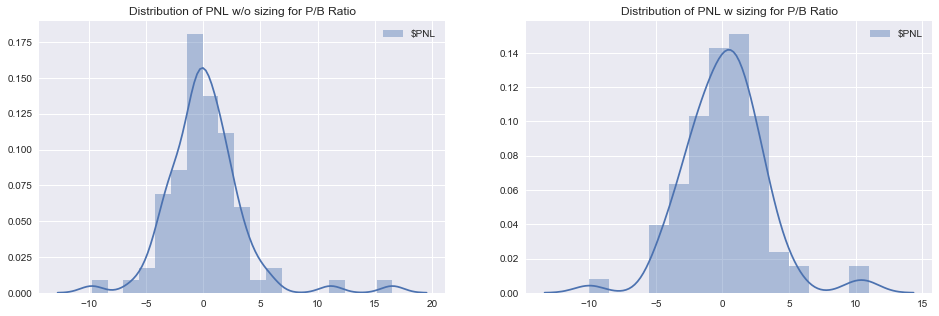

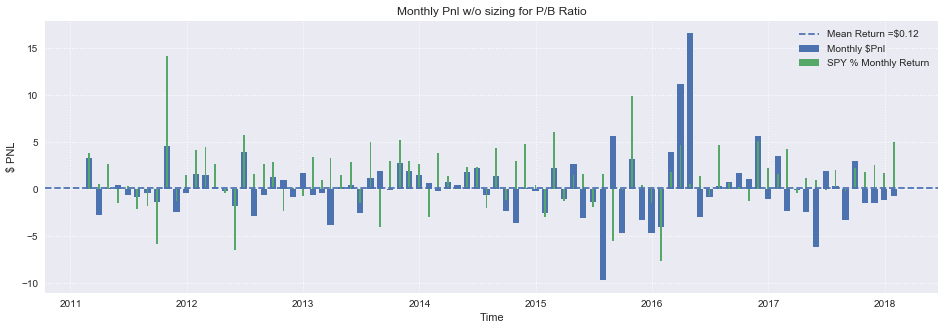

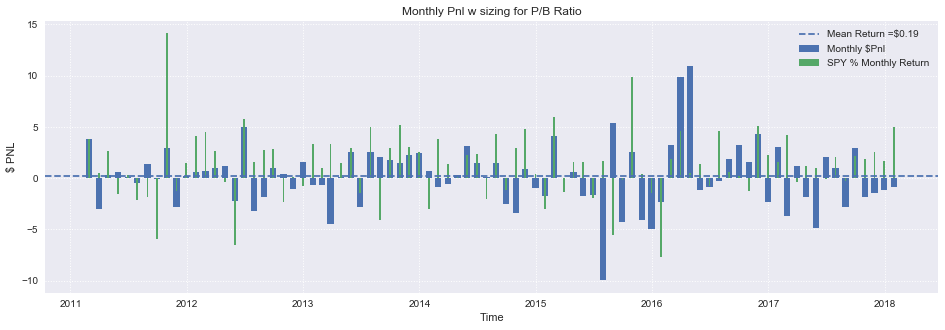

In [801]:
get_graph(o2,o2_s,"P/B Ratio")

###  D/E Ratio

=======================Without sizing effect=======================

Total $PNL 2011-2018 :-3.52
Maximum $PNL in a month :5.45
Maximum $Loss in a month :-5.69

=======================With sizing effect=======================

Total $PNL 2011-2018 :-19.02
Maximum $PNL in a month :3.72
Maximum $Loss in a month :-5.73


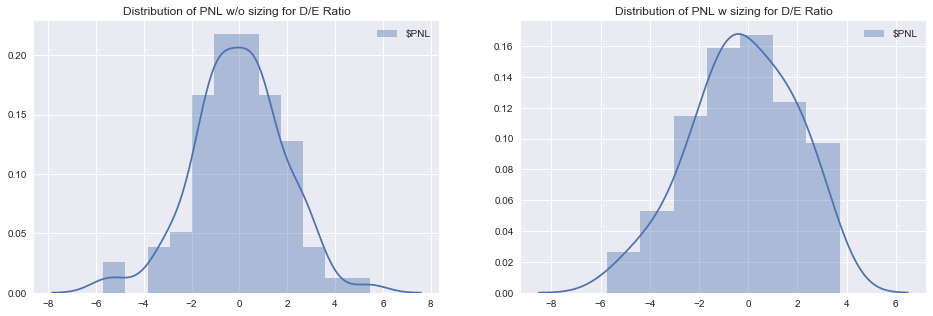

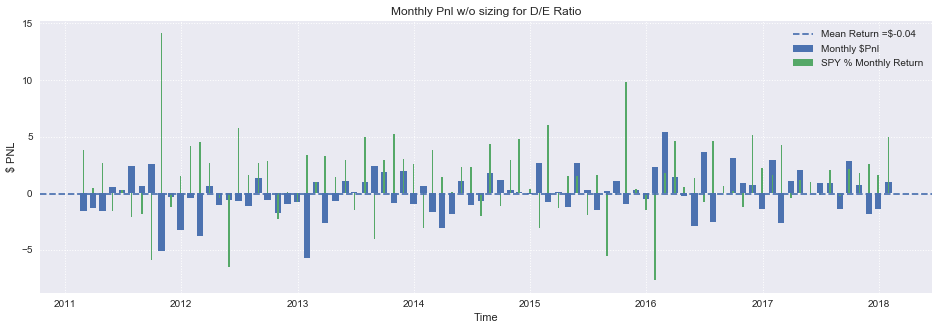

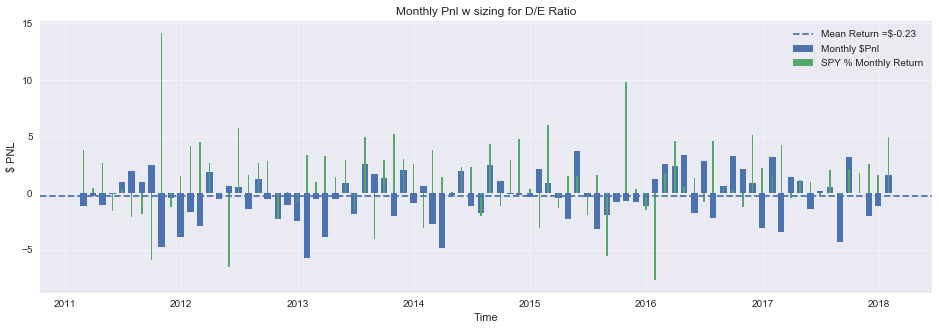

In [802]:
get_graph(o3,o3_s,"D/E Ratio")

###  P/E + P/B Combined Ratio

=======================Without sizing effect=======================

Total $PNL 2011-2018 :-51.72
Maximum $PNL in a month :6.64
Maximum $Loss in a month :-6.39

=======================With sizing effect=======================

Total $PNL 2011-2018 :-48.34
Maximum $PNL in a month :5.88
Maximum $Loss in a month :-6.95


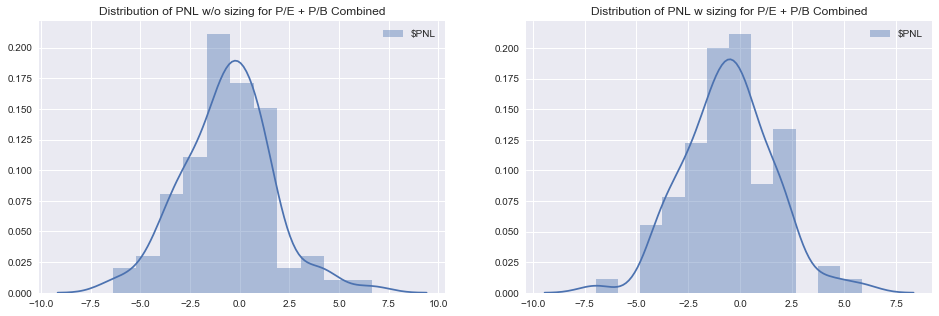

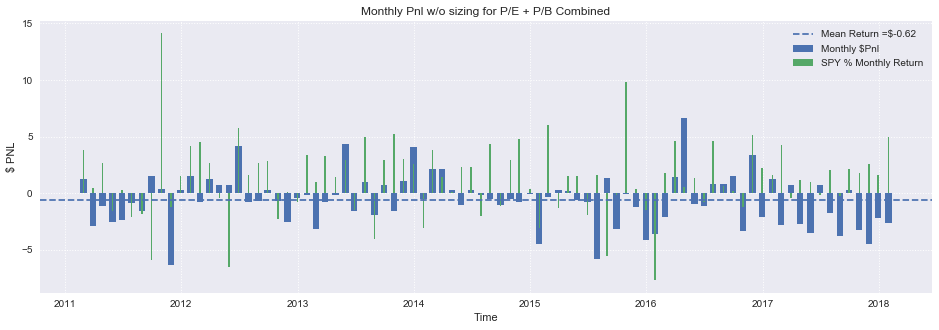

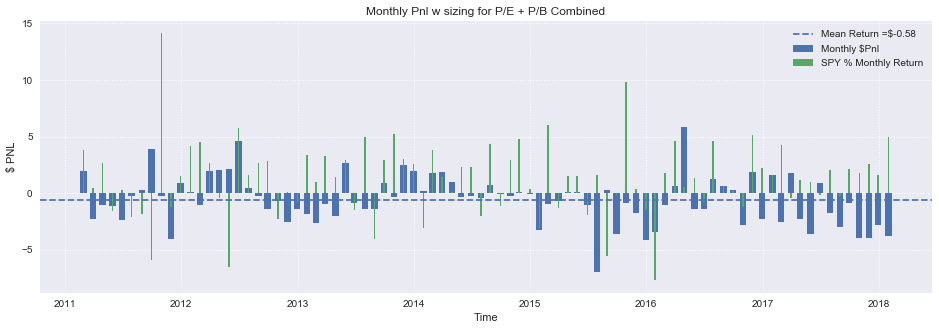

In [803]:
get_graph(o4,o4_s,"P/E + P/B Combined")

### Now instead of Directly using Ratio's lets use the Delta of Ratio for Quantile
    I've taken the delta against last 20 day moving average as that is much more smooth than just using one day. We ideally want to check any P/E that is different from it's mean (historic) hence we would expect it to return back to that level.

###  P/E Delta 

In [804]:
pe_delta=(pe_ratio-pe_ratio.rolling(20).mean())
pe_delta.iloc[20:,:].head()

,AAN,AAP,AAWW,ABB,ABC,ABG,ABT,ACCO,ACHV,ACIW,...,XLNX,XOM,XOMA,XPO,XRX,YORW,YRCW,YUM,ZBH,ZEUS
Date,,,,,,,,,,,,,,,,,,,,,
2011-02-01,-0.008235,-0.002818,0.014530,0.007233,0.000328,-0.002199,-0.010615,-0.005184,0.011761,0.107774,...,0.290218,0.277853,0.578500,0.324657,-0.325346,0.325960,-0.039209,-0.406543,0.920013,0.010845
2011-02-02,-0.008645,-0.007425,0.005961,-0.000139,-0.003166,-0.003082,-0.007547,-0.007742,0.008125,0.104885,...,0.245607,0.240120,0.474238,0.289104,-0.296067,0.146498,-0.046890,-0.320166,0.925714,-0.039525
2011-02-03,-0.006465,-0.005272,0.015997,-0.000496,-0.004986,-0.002568,-0.007129,-0.008344,0.002517,0.068339,...,0.147940,0.213411,0.607604,0.186918,-0.268500,0.031792,-0.059882,0.039272,0.847976,0.002203
2011-02-04,-0.006084,-0.000901,0.014516,-0.002486,0.000724,-0.002083,-0.006623,-0.010445,0.001584,0.054542,...,0.312994,0.193374,0.561393,0.276261,-0.248874,-0.157365,-0.064981,0.062616,0.798380,-0.041360
2011-02-07,-0.005680,-0.000312,0.015869,-0.001856,-0.000642,0.003218,-0.007820,-0.005763,0.006849,0.065265,...,0.204279,0.186285,0.352743,0.186383,-0.252364,0.102067,-0.035010,0.112469,0.560142,0.049347


###  P/B Delta

In [805]:
pb_delta=(pb_ratio-pb_ratio.rolling(20).mean())
pb_delta.iloc[20:,:].head()

,AAN,AAP,AAWW,ABB,ABC,ABG,ABT,ACCO,ACHV,ACIW,...,XLNX,XOM,XOMA,XPO,XRX,YORW,YRCW,YUM,ZBH,ZEUS
Date,,,,,,,,,,,,,,,,,,,,,
2011-02-01,-0.000079,0.000042,0.000016,8.945444e-05,0.000044,-0.000010,-0.000093,-0.000247,-0.000203,0.000180,...,0.072289,0.060927,-0.371200,0.039014,-0.014191,0.022864,-0.026644,-0.101398,0.055792,-0.006447
2011-02-02,-0.000122,-0.000013,-0.000050,1.446857e-05,-0.000013,-0.000046,-0.000116,-0.000550,-0.000125,0.000191,...,0.056488,0.049363,-0.314450,0.029771,-0.013972,0.009462,-0.031506,-0.081164,0.055005,-0.009688
2011-02-03,-0.000095,0.000047,-0.000030,7.512835e-06,-0.000039,-0.000032,-0.000108,-0.000492,-0.000071,0.000117,...,0.041447,0.047313,-0.405079,0.026254,-0.010419,0.008673,-0.041767,0.033531,0.052661,-0.005206
2011-02-04,-0.000133,0.000325,-0.000087,-9.291534e-07,0.000074,-0.000041,-0.000162,-0.000924,-0.000004,0.000138,...,0.065098,0.038259,-0.390733,0.025304,-0.012246,-0.008590,-0.043729,0.027300,0.046432,-0.009115
2011-02-07,-0.000155,0.000340,-0.000100,-4.618480e-06,0.000032,0.000016,-0.000201,-0.000951,-0.000053,0.000169,...,0.051652,0.041860,-0.225367,0.024905,-0.010231,0.010850,-0.024729,0.039437,0.032450,-0.002343


### D/E Delta

In [806]:
de_delta=(de_ratio-de_ratio.rolling(20).mean())
de_delta.iloc[20:,:].head()

,AAN,AAP,AAWW,ABB,ABC,ABG,ABT,ACCO,ACHV,ACIW,...,XLNX,XOM,XOMA,XPO,XRX,YORW,YRCW,YUM,ZBH,ZEUS
Date,,,,,,,,,,,,,,,,,,,,,
2011-02-01,0.001407,-0.002823,-0.020845,-0.005621,-0.010090,-0.023399,0.034876,0.227925,0.008146,-0.017724,...,-0.023409,-0.008043,0.053145,-0.003392,0.019347,-0.034309,0.166065,0.038114,-0.015554,-0.000333
2011-02-02,0.001841,0.011217,-0.008977,-0.001390,0.001180,0.009883,0.023894,0.244801,0.006970,-0.014987,...,-0.019547,-0.006853,0.044968,-0.002859,0.019002,-0.021408,0.191300,0.023742,-0.015429,0.001742
2011-02-03,0.000871,0.004032,-0.018435,-0.001504,0.003587,-0.018364,0.017377,0.205662,0.004050,-0.009858,...,-0.014539,-0.006292,0.065221,-0.002441,0.014461,-0.018157,0.235883,-0.037676,-0.014251,0.000049
2011-02-04,0.000677,-0.006464,-0.016866,-0.000602,-0.010654,-0.032781,0.013721,0.263258,0.003910,-0.007724,...,-0.021381,-0.005545,0.063415,-0.002545,0.016311,-0.002475,0.243001,-0.039218,-0.013247,0.001897
2011-02-07,0.000496,-0.009454,-0.022788,-0.001652,-0.008600,-0.132269,0.019238,0.249854,0.004722,-0.012518,...,-0.017432,-0.005777,0.032403,-0.002375,0.013305,-0.021423,0.152504,-0.043024,-0.009732,-0.002133


### P/B + P/E Combination Delta

In [807]:
pb_pe_delta=(pb_pe_combination-pb_pe_combination.rolling(20).mean())
pb_pe_delta.iloc[20:,:].head()

,AAN,AAP,AAWW,ABB,ABC,ABG,ABT,ACCO,ACHV,ACIW,...,XLNX,XOM,XOMA,XPO,XRX,YORW,YRCW,YUM,ZBH,ZEUS
Date,,,,,,,,,,,,,,,,,,,,,
2011-02-01,-0.004157,-0.001388,0.007273,0.003661,0.000186,-0.001104,-0.005354,-0.002715,0.005779,0.053977,...,0.181253,0.169390,0.103650,0.181835,-0.169768,0.174412,-0.032926,-0.253970,0.487902,0.002199
2011-02-02,-0.004384,-0.003719,0.002955,-0.000062,-0.001589,-0.001564,-0.003831,-0.004146,0.004000,0.052538,...,0.151047,0.144741,0.079894,0.159438,-0.155019,0.077980,-0.039198,-0.200665,0.490359,-0.024606
2011-02-03,-0.003280,-0.002613,0.007984,-0.000244,-0.002513,-0.001300,-0.003618,-0.004418,0.001223,0.034228,...,0.094693,0.130362,0.101263,0.106586,-0.139459,0.020233,-0.050825,0.036402,0.450319,-0.001502
2011-02-04,-0.003109,-0.000288,0.007214,-0.001243,0.000399,-0.001062,-0.003392,-0.005685,0.000790,0.027340,...,0.189046,0.115816,0.085330,0.150783,-0.130560,-0.082978,-0.054355,0.044958,0.422406,-0.025238
2011-02-07,-0.002918,0.000014,0.007885,-0.000930,-0.000305,0.001617,-0.004010,-0.003357,0.003398,0.032717,...,0.127965,0.114072,0.063688,0.105644,-0.131298,0.056459,-0.029870,0.075953,0.296296,0.023502


In [808]:
o1=quantile_trading(EOD_Data,pe_delta,month_start,month_end,False)
o2=quantile_trading(EOD_Data,pb_delta,month_start,month_end,False)
o3=quantile_trading(EOD_Data,de_delta,month_start,month_end,False)
o4=quantile_trading(EOD_Data,pb_pe_delta,month_start,month_end,False)

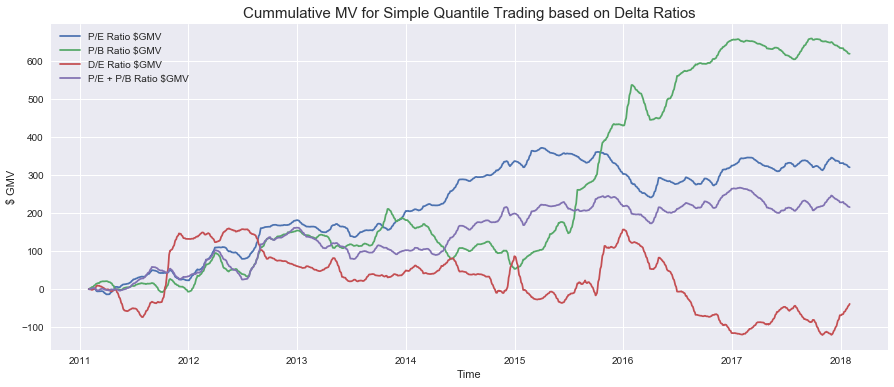

In [809]:
plt.subplots(figsize=(15,6))
plt.plot((o1.SS_Cash+o1.SS_MV+o1.LB_Cash+o1.LB_MV).cumsum(),label="P/E Ratio $GMV")
plt.plot((o2.SS_Cash+o2.SS_MV+o2.LB_Cash+o2.LB_MV).cumsum(),label="P/B Ratio $GMV")
plt.plot((o3.SS_Cash+o3.SS_MV+o3.LB_Cash+o3.LB_MV).cumsum(),label="D/E Ratio $GMV")
plt.plot((o4.SS_Cash+o4.SS_MV+o4.LB_Cash+o4.LB_MV).cumsum(),label="P/E + P/B Ratio $GMV")
plt.xlabel("Time")
plt.ylabel("$ GMV")
plt.title("Cummulative MV for Simple Quantile Trading based on Ratios Delta",size=15)
plt.legend()
plt.show()

In [810]:
o1_s=quantile_trading(EOD_Data,pe_delta,month_start,month_end,True)
o2_s=quantile_trading(EOD_Data,pb_delta,month_start,month_end,True)
o3_s=quantile_trading(EOD_Data,de_delta,month_start,month_end,True)
o4_s=quantile_trading(EOD_Data,pb_pe_delta,month_start,month_end,True)

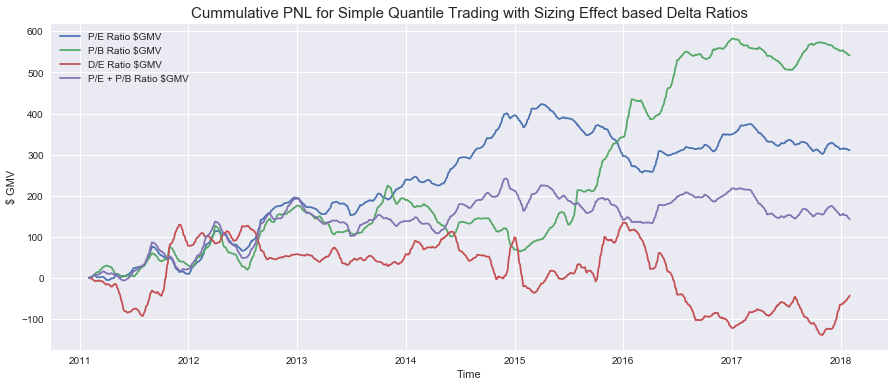

In [811]:
plt.subplots(figsize=(15,6))
plt.plot((o1_s.SS_Cash+o1_s.SS_MV+o1_s.LB_Cash+o1_s.LB_MV).cumsum(),label="P/E Ratio $GMV")
plt.plot((o2_s.SS_Cash+o2_s.SS_MV+o2_s.LB_Cash+o2_s.LB_MV).cumsum(),label="P/B Ratio $GMV")
plt.plot((o3_s.SS_Cash+o3_s.SS_MV+o3_s.LB_Cash+o3_s.LB_MV).cumsum(),label="D/E Ratio $GMV")
plt.plot((o4_s.SS_Cash+o4_s.SS_MV+o4_s.LB_Cash+o4_s.LB_MV).cumsum(),label="P/E + P/B Ratio $GMV")
plt.xlabel("Time")
plt.ylabel("$ GMV")
plt.title("Cummulative PNL for Simple Quantile Trading on Ratios Delta with Sizing Effect ",size=15)
plt.legend()
plt.show()

###  P/E Ratio Delta

=======================Without sizing effect=======================

Total $PNL 2011-2018 :29.36
Maximum $PNL in a month :4.38
Maximum $Loss in a month :-2.94

=======================With sizing effect=======================

Total $PNL 2011-2018 :30.21
Maximum $PNL in a month :4.99
Maximum $Loss in a month :-3.52


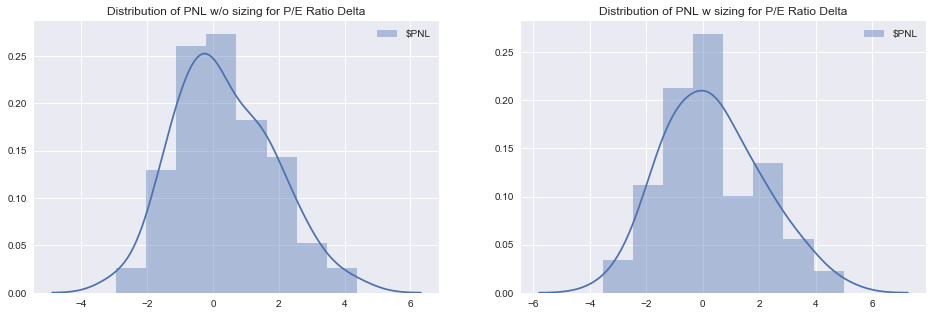

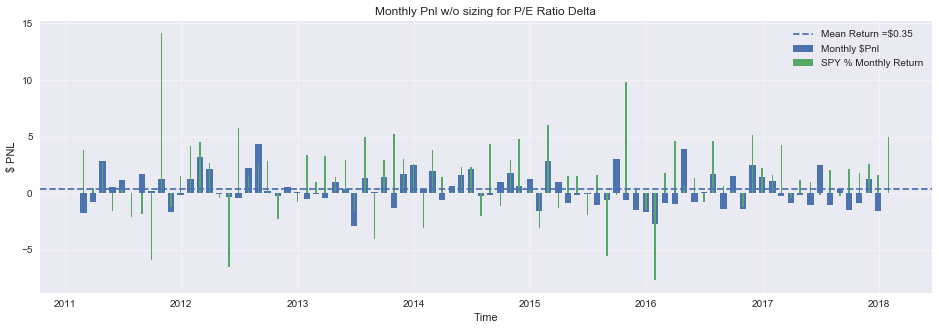

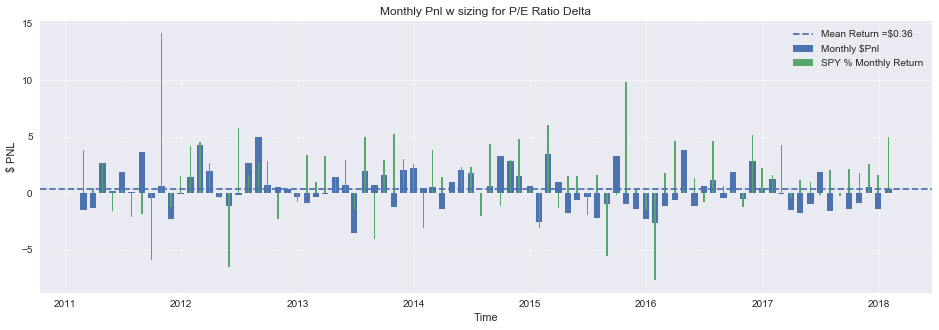

In [812]:
get_graph(o1,o1_s,"P/E Ratio Delta")

###  P/B Ratio Delta 

=======================Without sizing effect=======================

Total $PNL 2011-2018 :41.69
Maximum $PNL in a month :9.54
Maximum $Loss in a month :-3.77

=======================With sizing effect=======================

Total $PNL 2011-2018 :41.41
Maximum $PNL in a month :8.31
Maximum $Loss in a month :-4.01


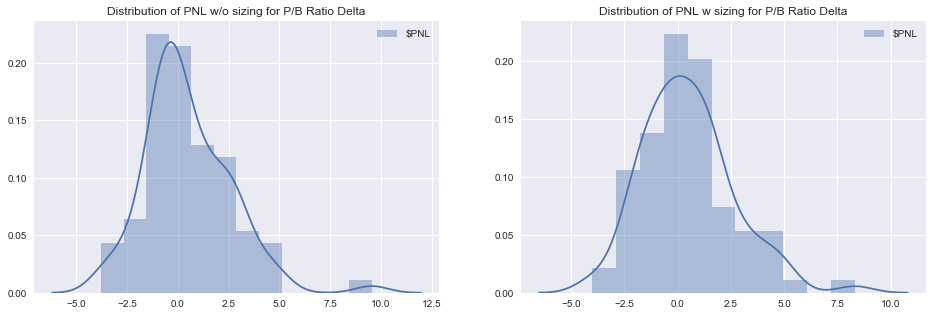

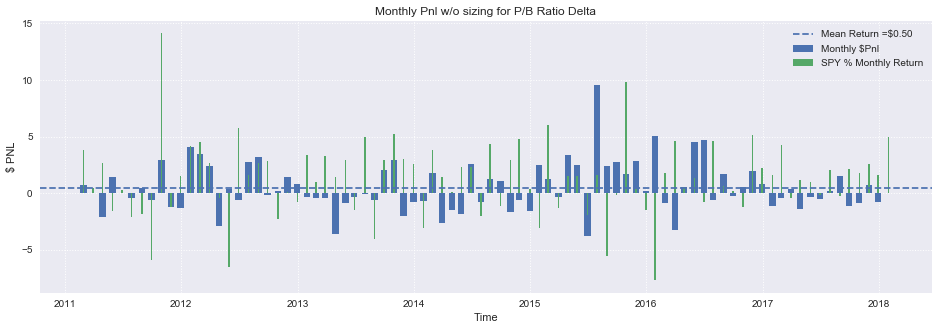

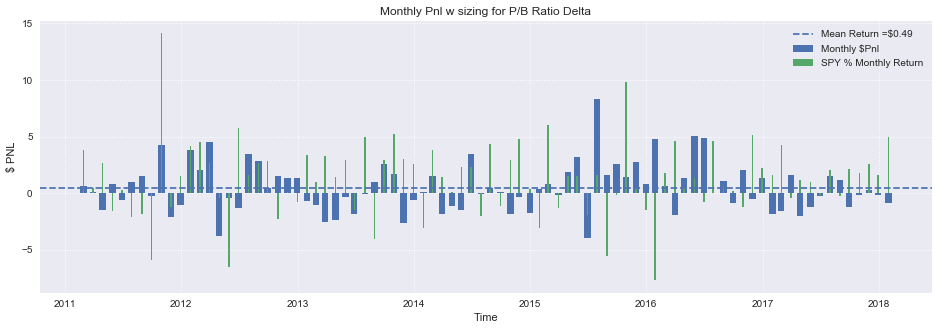

In [813]:
get_graph(o2,o2_s,"P/B Ratio Delta")

###  D/E Ratio Delta

=======================Without sizing effect=======================

Total $PNL 2011-2018 :5.73
Maximum $PNL in a month :10.64
Maximum $Loss in a month :-4.84

=======================With sizing effect=======================

Total $PNL 2011-2018 :1.61
Maximum $PNL in a month :9.11
Maximum $Loss in a month :-5.65


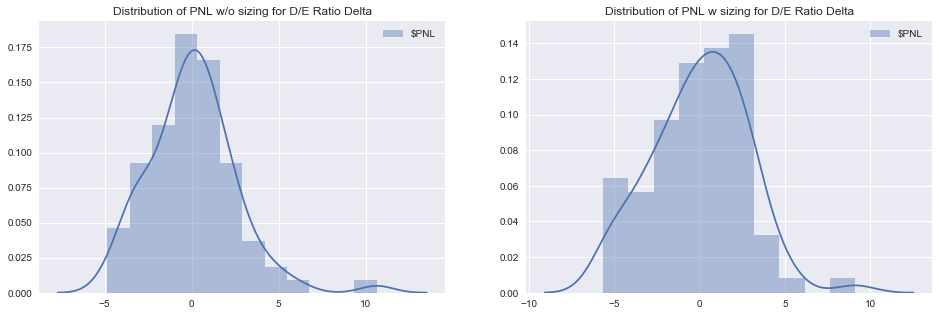

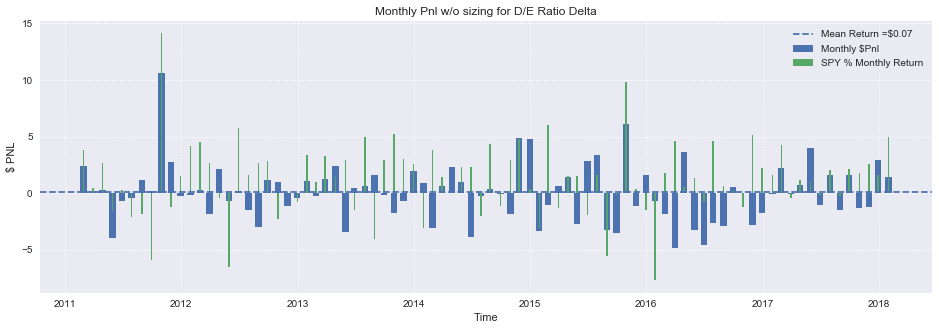

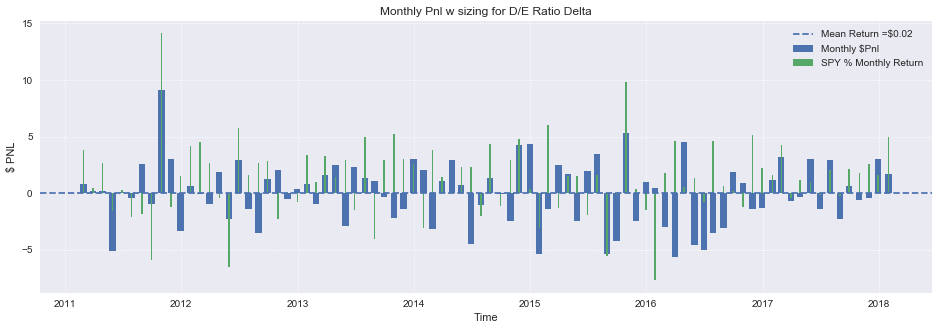

In [814]:
get_graph(o3,o3_s,"D/E Ratio Delta")

###  P/E + P/B Combined Delta

=======================Without sizing effect=======================

Total $PNL 2011-2018 :20.49
Maximum $PNL in a month :3.89
Maximum $Loss in a month :-3.71

=======================With sizing effect=======================

Total $PNL 2011-2018 :18.73
Maximum $PNL in a month :4.15
Maximum $Loss in a month :-4.26


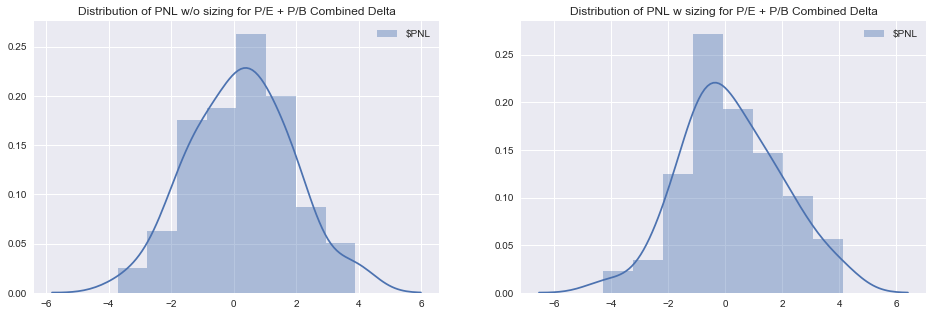

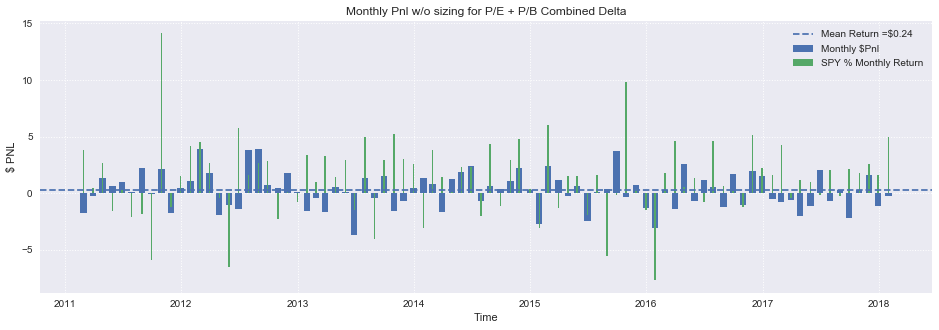

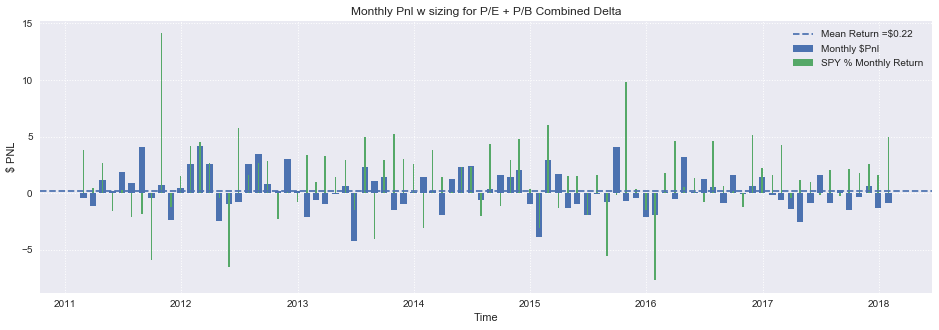

In [815]:
get_graph(o4,o4_s,"P/E + P/B Combined Delta")

# Beta Hedged  portfolio
    Please note we only use 10 stocks instead of 1/10 as this makes the program very slow ( regressing on ~90 securities indivisually)

In [824]:
def quantile_trading_beta_hedge(prices,criteria,month_start,month_end,spy,sizing):
    prices=prices.copy()
    criteria=criteria.copy()
    month_start=month_start.copy()
    month_end=month_end.copy()
    
    df=EOD_Data[[]]
    df['SS_Cash']=0.0
    df["SS_MV"]=0.0
    df['LB_Cash']=0.0
    df["LB_MV"]=0.0
    df["spy_Cash"]=0.0
    df["spy_MV"]=0.0
    position=False
    for date in prices.index.values:
        if date in month_start:
            qty_bought,qty_sold=0.0,0.0
            z=z_score(criteria.loc[date])
            n=10
            #n=int(len(z)/10.0)
            if(sizing==True):
                w_sells=np.array([2*i/((n+1)) for i in range(1,n+1)])
                w_buys=np.flip(w_sells)
            else:
                w_sells,w_buys=np.ones(n),np.ones(n)
            sells=z[-n:].index
            buys=z[:n].index
            qty_bought= w_buys/prices.loc[date,buys]
            qty_sold= w_sells/prices.loc[date,sells]
            df.at[date,'SS_Cash']=+sum(qty_sold*prices.loc[date,sells])
            df.at[date,'LB_Cash']=-sum(qty_bought*prices.loc[date,buys])
            df.at[date,'SS_MV']=-sum(qty_sold*prices.loc[date,sells])
            df.at[date,'LB_MV']=sum(qty_bought*prices.loc[date,buys])
            position=True
            
            alpha1=beta_reg(prices,spy,date,buys,sells,w_buys,w_sells)
            df.at[date,"spy_Cash"]=-alpha1
            spy_qty=alpha1/spy.loc[date]
            df.at[date,"spy_MV"]=spy_qty*spy.loc[date]


        elif date in month_end:
            df.at[date,'SS_Cash']=-sum(qty_sold*prices.loc[date,sells])
            df.at[date,'LB_Cash']=sum(qty_bought*prices.loc[date,buys])
            position=False
            
            df.at[date,"spy_Cash"]=-spy_qty*spy.loc[date]
            qty_bought,qty_sold,spy_qty=0.0,0.0,0.0


        elif position==True:
            df.at[date,'SS_MV']=-sum(qty_sold*prices.loc[date,sells])
            df.at[date,'LB_MV']=sum(qty_bought*prices.loc[date,buys])
            df.at[date,"spy_MV"]=spy_qty*spy.loc[date]

    return df.iloc[19:]    
        

In [825]:
def beta_reg(prices,spy,date,buys,sells,w_buys,w_sells):
    prices,spy,date,buys,sells=prices.copy(),spy.copy(),date.copy(),buys.copy(),sells.copy()
    w_buys,w_sells=w_buys.copy(),w_sells.copy()
    alpha1=0.0
    s_d,e_d=date-np.timedelta64(30,"D"),date-np.timedelta64(1,"D")
    i=0
    for tick in sells:
        Y=prices.loc[s_d:e_d,tick].pct_change().dropna()
        X=spy.loc[s_d:e_d].pct_change().dropna()
        model = sm.OLS(Y,sm.add_constant(X))
        results = model.fit()
        alpha1+=results.params[1] * w_sells[i]
        i+=1
    i=0
    for tick in buys:
        Y=prices.loc[s_d:e_d,tick].pct_change().dropna()
        X=spy.loc[s_d:e_d].pct_change().dropna()
        model = sm.OLS(Y,sm.add_constant(X))
        results = model.fit()
        alpha1-=results.params[1] * w_buys[i]
        i+=1
        
    return alpha1

In [823]:
def get_graph_beta(df1,df2,s):
    df1=df1.copy()
    df2=df2.copy()
    print("=======================Without sizing effect=======================\n")
    print("Total $PNL 2011-2018 :%.2f"%(df1.loc[month_end,"SS_Cash"]+df1.loc[month_end,"LB_Cash"]+df1.loc[month_end,"spy_Cash"]).sum())
    print("Maximum $PNL in a month :%.2f"%(df1.loc[month_end,"SS_Cash"]+df1.loc[month_end,"LB_Cash"]+df1.loc[month_end,"spy_Cash"]).max())
    print("Maximum $Loss in a month :%.2f"%(df1.loc[month_end,"SS_Cash"]+df1.loc[month_end,"LB_Cash"]+df1.loc[month_end,"spy_Cash"]).min())
    print("\n=======================With sizing effect=======================\n")
    print("Total $PNL 2011-2018 :%.2f"%(df2.loc[month_end,"SS_Cash"]+df2.loc[month_end,"LB_Cash"]+df2.loc[month_end,"spy_Cash"]).sum())
    print("Maximum $PNL in a month :%.2f"%(df2.loc[month_end,"SS_Cash"]+df2.loc[month_end,"LB_Cash"]+df2.loc[month_end,"spy_Cash"]).max())
    print("Maximum $Loss in a month :%.2f"%(df2.loc[month_end,"SS_Cash"]+df2.loc[month_end,"LB_Cash"]+df2.loc[month_end,"spy_Cash"]).min())
    
    plt.figure(figsize=(16,5))
    plt.subplot(121)
    sn.distplot(df1.loc[month_end,"SS_Cash"]+df1.loc[month_end,"LB_Cash"]+df1.loc[month_end,"spy_Cash"],label="$PNL")
    plt.legend()
    plt.title("Distribution of PNL w/o sizing for {}".format(s),size=12)
    
    plt.subplot(122)
    sn.distplot(df2.loc[month_end,"SS_Cash"]+df2.loc[month_end,"LB_Cash"]+df2.loc[month_end,"spy_Cash"],label="$PNL")
    plt.legend()
    plt.title("Distribution of PNL w sizing for {}".format(s),size=12)
    plt.show()
    plt.close()
    
    r_mean=sum(df1.loc[month_end,"SS_Cash"]+df1.loc[month_end,"LB_Cash"]+df1.loc[month_end,"spy_Cash"])/(len(month_end))

    plt.subplots(figsize=(16,5))
    plt.bar(month_end,df1.loc[month_end,"SS_Cash"]+df1.loc[month_end,"LB_Cash"],width=20,label="Monthly $Pnl")
    plt.axhline(y=r_mean,linestyle="--",label="Mean Return =${:.2f}".format(r_mean))
    plt.bar(month_end,spy.pct_change(20).loc[month_end]*100,width=5,label="SPY % Monthly Return")
    plt.ylabel("$ PNL")
    plt.xlabel("Time")
    plt.title("Monthly Pnl w/o sizing for {}".format(s),size=12)
    plt.legend()
    plt.grid(linestyle=":")
    plt.show()
    
    r_mean=sum(df2.loc[month_end,"SS_Cash"]+df2.loc[month_end,"LB_Cash"]+df2.loc[month_end,"spy_Cash"])/(len(month_end))

    plt.subplots(figsize=(16,5))
    plt.bar(month_end,df2.loc[month_end,"SS_Cash"]+df2.loc[month_end,"LB_Cash"]+df2.loc[month_end,"spy_Cash"],width=20,label="Monthly $Pnl")
    plt.axhline(y=r_mean,linestyle="--",label="Mean Return =${:.2f}".format(r_mean))
    plt.bar(month_end,spy.pct_change(20).loc[month_end]*100,width=5,label="SPY % Monthly Return")
    plt.ylabel("$ PNL")
    plt.xlabel("Time")
    plt.title("Monthly Pnl w sizing for {}".format(s),size=12)
    plt.legend()
    plt.grid(linestyle=":")
    plt.show()
    

In [826]:
o1=quantile_trading_beta_hedge(EOD_Data,pe_ratio,month_start,month_end,spy,False)
o2=quantile_trading_beta_hedge(EOD_Data,pb_ratio,month_start,month_end,spy,False)
o3=quantile_trading_beta_hedge(EOD_Data,de_ratio,month_start,month_end,spy,False)
o4=quantile_trading_beta_hedge(EOD_Data,pb_pe_combination,month_start,month_end,spy,False)

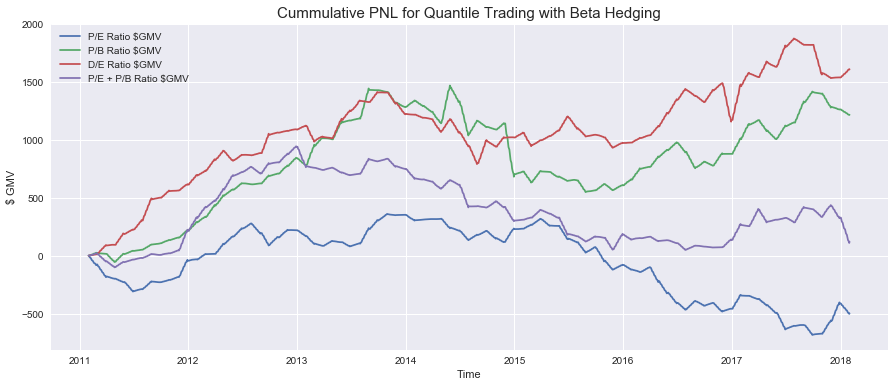

In [827]:
plt.subplots(figsize=(15,6))
plt.plot((o1.SS_Cash+o1.SS_MV+o1.LB_Cash+o1.LB_MV +o1.spy_Cash+o1.spy_MV).cumsum(),label="P/E Ratio $GMV")
plt.plot((o2.SS_Cash+o2.SS_MV+o2.LB_Cash+o2.LB_MV +o2.spy_Cash+o2.spy_MV).cumsum(),label="P/B Ratio $GMV")
plt.plot((o3.SS_Cash+o3.SS_MV+o3.LB_Cash+o3.LB_MV +o3.spy_Cash+o3.spy_MV).cumsum(),label="D/E Ratio $GMV")
plt.plot((o4.SS_Cash+o4.SS_MV+o4.LB_Cash+o4.LB_MV +o4.spy_Cash+o4.spy_MV).cumsum(),label="P/E + P/B Ratio $GMV")
plt.xlabel("Time")
plt.ylabel("$ GMV")
plt.title("Cummulative PNL for Quantile Trading with Beta Hedging",size=15)
plt.legend()
plt.show()

In [828]:
o1_s=quantile_trading_beta_hedge(EOD_Data,pe_ratio,month_start,month_end,spy,True)
o2_s=quantile_trading_beta_hedge(EOD_Data,pb_ratio,month_start,month_end,spy,True)
o3_s=quantile_trading_beta_hedge(EOD_Data,de_ratio,month_start,month_end,spy,True)
o4_s=quantile_trading_beta_hedge(EOD_Data,pb_pe_combination,month_start,month_end,spy,True)

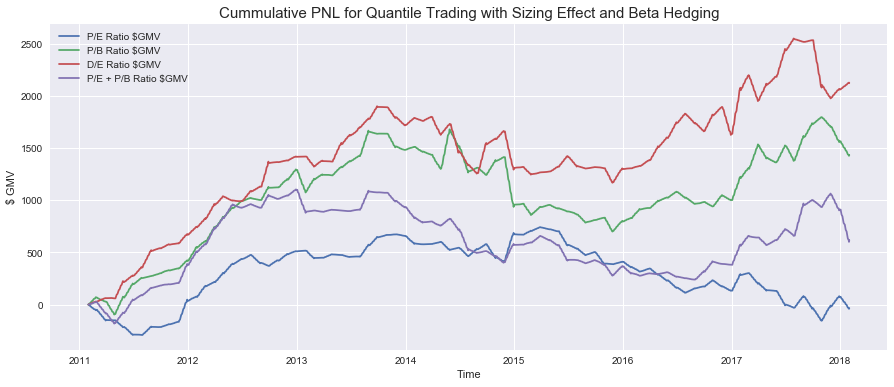

In [829]:
plt.subplots(figsize=(15,6))
plt.plot((o1_s.SS_Cash+o1_s.SS_MV+o1_s.LB_Cash+o1_s.LB_MV +o1_s.spy_Cash+o1_s.spy_MV ).cumsum(),label="P/E Ratio $GMV")
plt.plot((o2_s.SS_Cash+o2_s.SS_MV+o2_s.LB_Cash+o2_s.LB_MV +o2_s.spy_Cash+o2_s.spy_MV).cumsum(),label="P/B Ratio $GMV")
plt.plot((o3_s.SS_Cash+o3_s.SS_MV+o3_s.LB_Cash+o3_s.LB_MV +o3_s.spy_Cash+o3_s.spy_MV).cumsum(),label="D/E Ratio $GMV")
plt.plot((o4_s.SS_Cash+o4_s.SS_MV+o4_s.LB_Cash+o4_s.LB_MV +o4_s.spy_Cash+o4_s.spy_MV).cumsum(),label="P/E + P/B Ratio $GMV")
plt.xlabel("Time")
plt.ylabel("$ GMV")
plt.title("Cummulative PNL for Quantile Trading with Sizing Effect and Beta Hedging",size=15)
plt.legend()
plt.show()

###  P/E Ratio

=======================Without sizing effect=======================

Total $PNL 2011-2018 :27.03
Maximum $PNL in a month :7.76
Maximum $Loss in a month :-9.73

=======================With sizing effect=======================

Total $PNL 2011-2018 :-1.93
Maximum $PNL in a month :7.92
Maximum $Loss in a month :-13.43


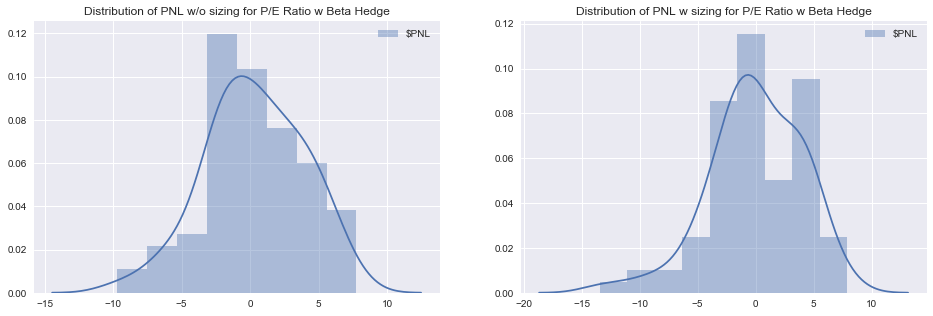

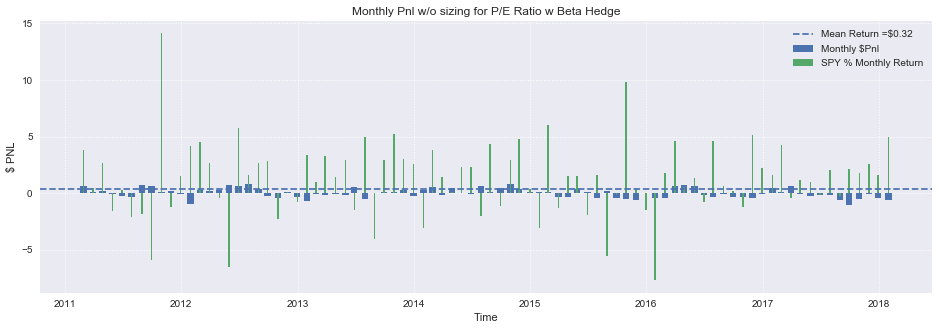

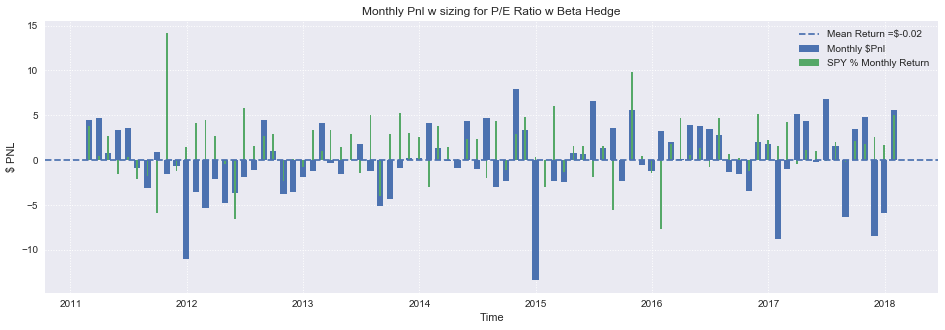

In [830]:
get_graph_beta(o1,o1_s,"P/E Ratio w Beta Hedge")

###  P/B Ratio

=======================Without sizing effect=======================

Total $PNL 2011-2018 :-76.71
Maximum $PNL in a month :20.94
Maximum $Loss in a month :-16.62

=======================With sizing effect=======================

Total $PNL 2011-2018 :-87.76
Maximum $PNL in a month :21.62
Maximum $Loss in a month :-19.99


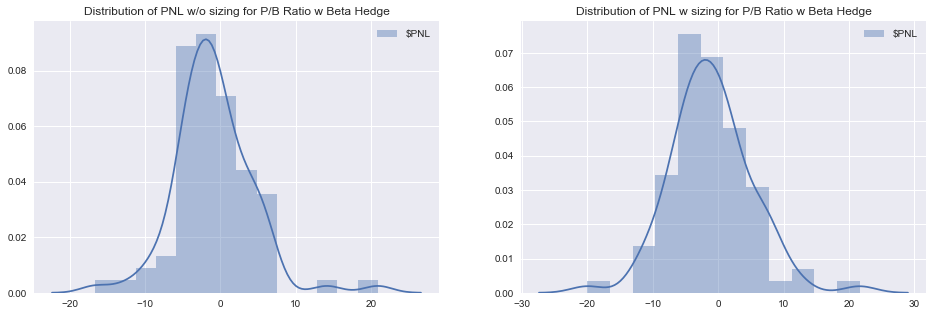

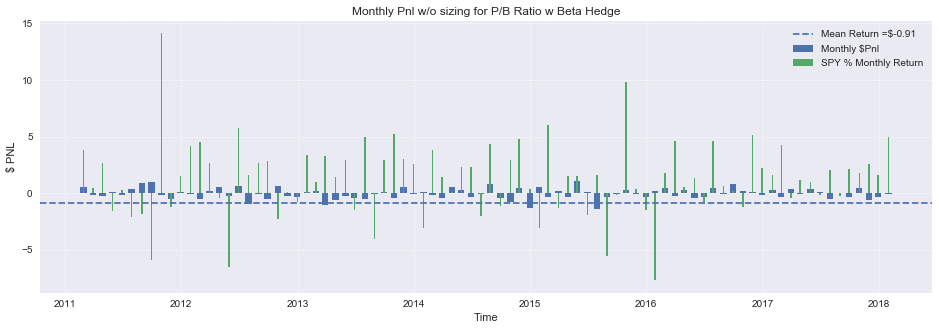

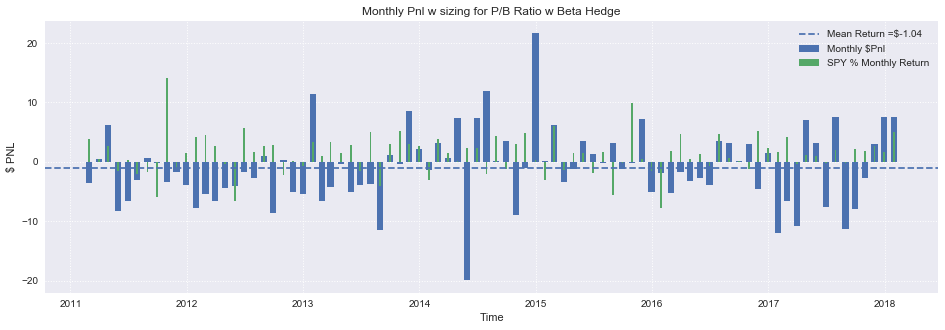

In [831]:
get_graph_beta(o2,o2_s,"P/B Ratio w Beta Hedge")

###  D/E Ratio

=======================Without sizing effect=======================

Total $PNL 2011-2018 :-108.14
Maximum $PNL in a month :15.32
Maximum $Loss in a month :-15.69

=======================With sizing effect=======================

Total $PNL 2011-2018 :-138.96
Maximum $PNL in a month :23.60
Maximum $Loss in a month :-22.17


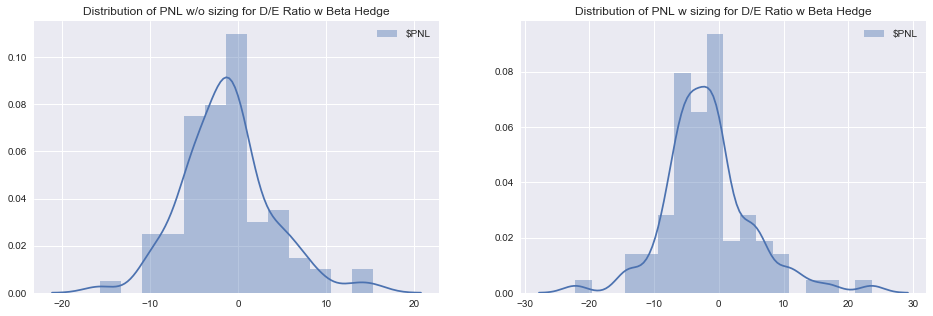

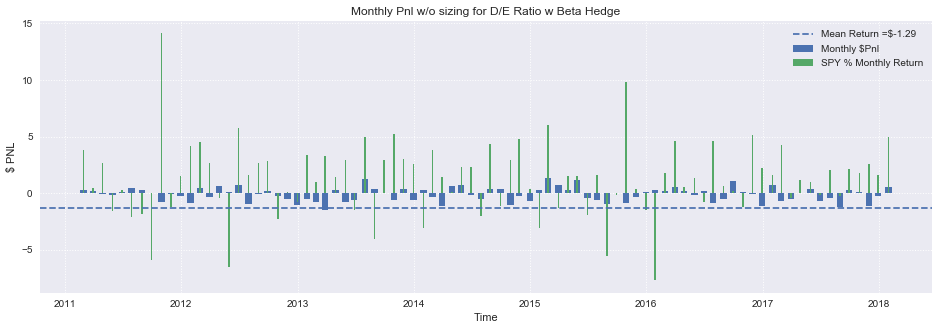

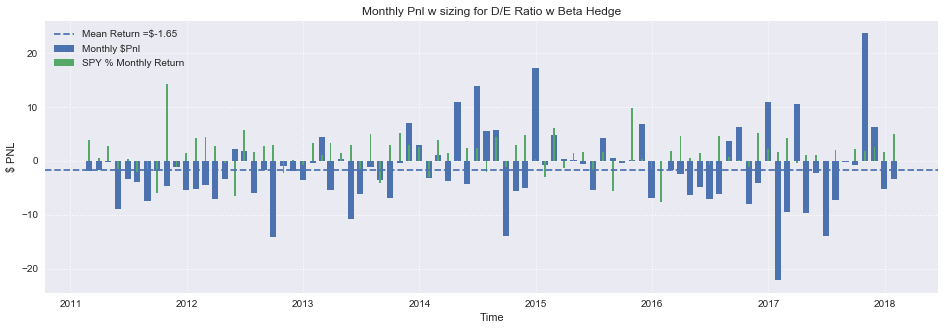

In [832]:
get_graph_beta(o3,o3_s,"D/E Ratio w Beta Hedge")

###  P/E + P/B Combined Ratio

=======================Without sizing effect=======================

Total $PNL 2011-2018 :-8.07
Maximum $PNL in a month :11.45
Maximum $Loss in a month :-8.70

=======================With sizing effect=======================

Total $PNL 2011-2018 :-38.81
Maximum $PNL in a month :16.67
Maximum $Loss in a month :-15.58


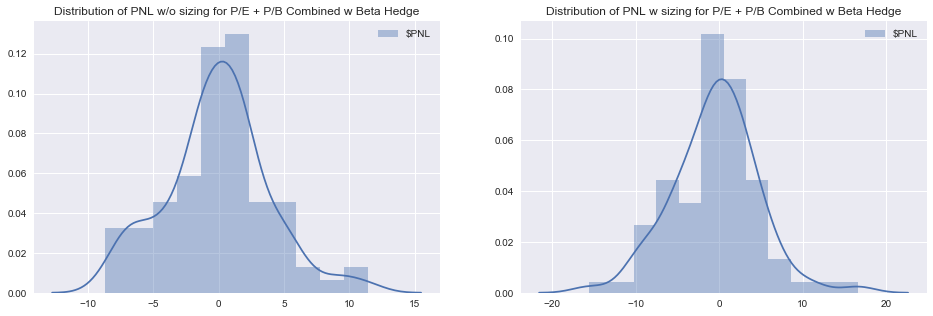

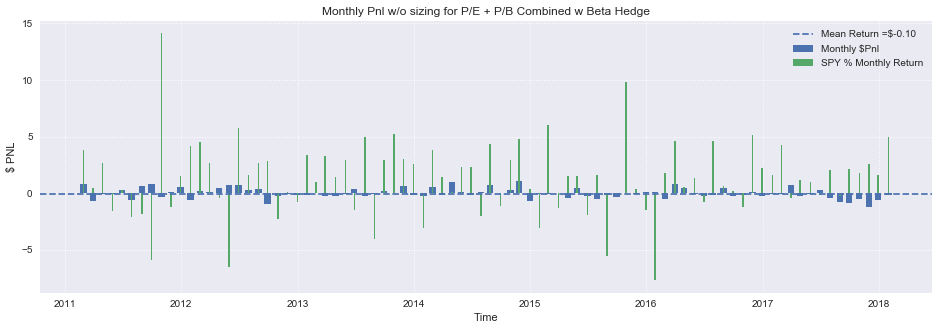

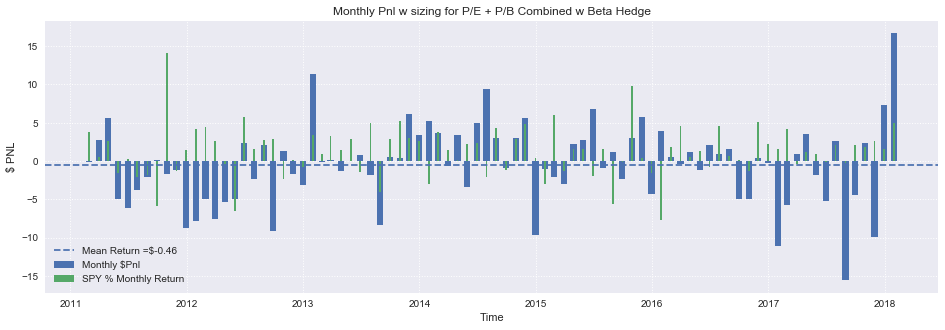

In [833]:
get_graph_beta(o4,o4_s,"P/E + P/B Combined w Beta Hedge")

## Beta Hedge Portfolios using Delta of Ratios 

In [834]:
o1=quantile_trading_beta_hedge(EOD_Data,pe_delta,month_start,month_end,spy,False)
o2=quantile_trading_beta_hedge(EOD_Data,pb_delta,month_start,month_end,spy,False)
o3=quantile_trading_beta_hedge(EOD_Data,de_delta,month_start,month_end,spy,False)
o4=quantile_trading_beta_hedge(EOD_Data,pb_pe_delta,month_start,month_end,spy,False)

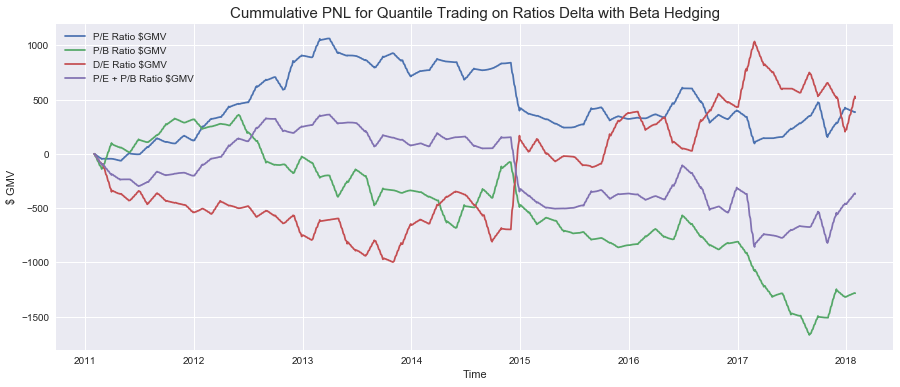

In [835]:
plt.subplots(figsize=(15,6))
plt.plot((o1.SS_Cash+o1.SS_MV+o1.LB_Cash+o1.LB_MV +o1.spy_Cash+o1.spy_MV).cumsum(),label="P/E Ratio $GMV")
plt.plot((o2.SS_Cash+o2.SS_MV+o2.LB_Cash+o2.LB_MV +o2.spy_Cash+o2.spy_MV).cumsum(),label="P/B Ratio $GMV")
plt.plot((o3.SS_Cash+o3.SS_MV+o3.LB_Cash+o3.LB_MV +o3.spy_Cash+o3.spy_MV).cumsum(),label="D/E Ratio $GMV")
plt.plot((o4.SS_Cash+o4.SS_MV+o4.LB_Cash+o4.LB_MV +o4.spy_Cash+o4.spy_MV).cumsum(),label="P/E + P/B Ratio $GMV")
plt.xlabel("Time")
plt.ylabel("$ GMV")
plt.title("Cummulative PNL for Quantile Trading on Ratios Delta with Beta Hedging",size=15)
plt.legend()
plt.show()

In [836]:
o1_s=quantile_trading_beta_hedge(EOD_Data,pe_delta,month_start,month_end,spy,True)
o2_s=quantile_trading_beta_hedge(EOD_Data,pb_delta,month_start,month_end,spy,True)
o3_s=quantile_trading_beta_hedge(EOD_Data,de_delta,month_start,month_end,spy,True)
o4_s=quantile_trading_beta_hedge(EOD_Data,pb_pe_delta,month_start,month_end,spy,True)

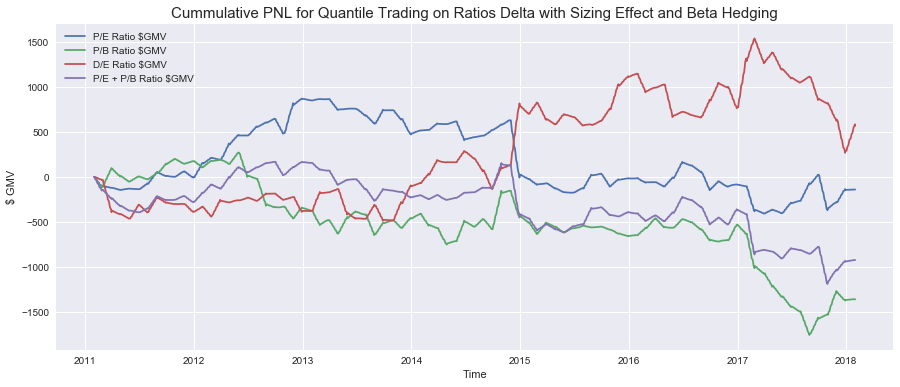

In [837]:
plt.subplots(figsize=(15,6))
plt.plot((o1_s.SS_Cash+o1_s.SS_MV+o1_s.LB_Cash+o1_s.LB_MV +o1_s.spy_Cash+o1_s.spy_MV ).cumsum(),label="P/E Ratio $GMV")
plt.plot((o2_s.SS_Cash+o2_s.SS_MV+o2_s.LB_Cash+o2_s.LB_MV +o2_s.spy_Cash+o2_s.spy_MV).cumsum(),label="P/B Ratio $GMV")
plt.plot((o3_s.SS_Cash+o3_s.SS_MV+o3_s.LB_Cash+o3_s.LB_MV +o3_s.spy_Cash+o3_s.spy_MV).cumsum(),label="D/E Ratio $GMV")
plt.plot((o4_s.SS_Cash+o4_s.SS_MV+o4_s.LB_Cash+o4_s.LB_MV +o4_s.spy_Cash+o4_s.spy_MV).cumsum(),label="P/E + P/B Ratio $GMV")
plt.xlabel("Time")
plt.ylabel("$ GMV")
plt.title("Cummulative PNL for Quantile Trading on Ratios Delta with Sizing Effect and Beta Hedging",size=15)
plt.legend()
plt.show()

###  P/E Ratio Delta w Beta Hedge

=======================Without sizing effect=======================

Total $PNL 2011-2018 :-13.91
Maximum $PNL in a month :22.35
Maximum $Loss in a month :-13.08

=======================With sizing effect=======================

Total $PNL 2011-2018 :22.64
Maximum $PNL in a month :31.88
Maximum $Loss in a month :-16.82


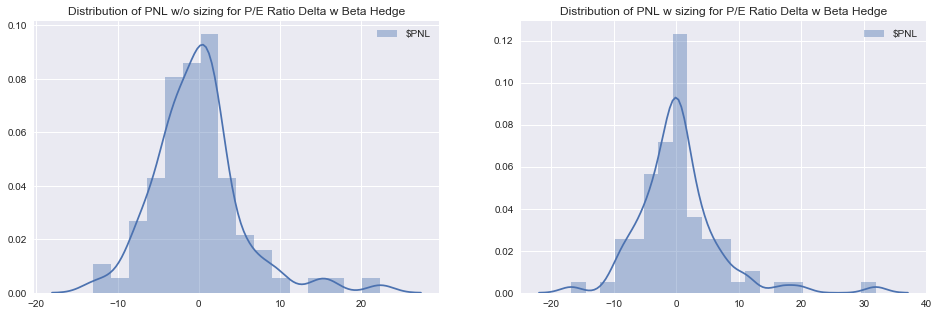

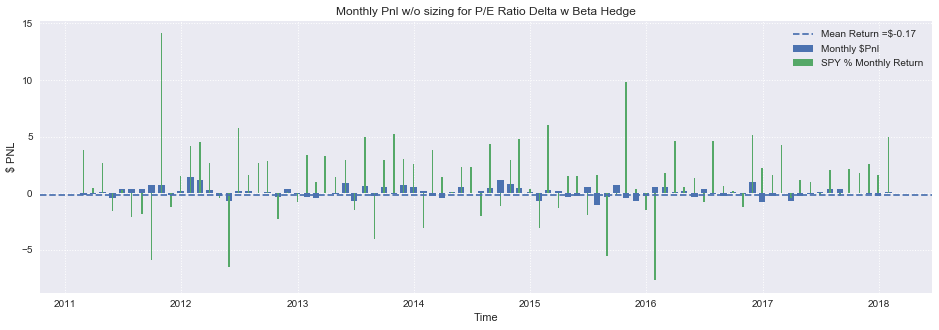

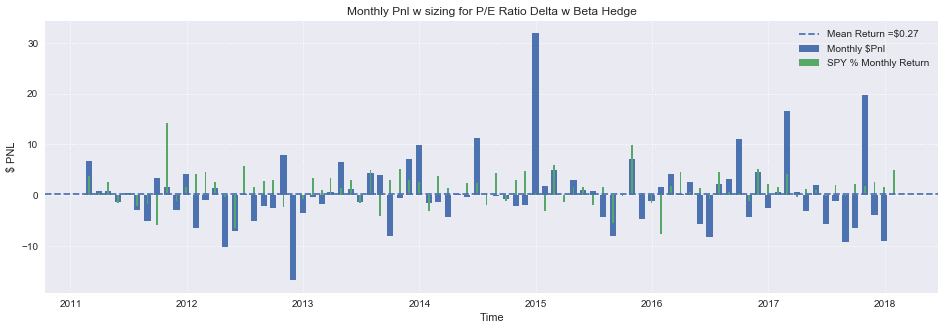

In [838]:
get_graph_beta(o1,o1_s,"P/E Ratio Delta w Beta Hedge")

###  P/B Ratio Delta w Beta Hedge

=======================Without sizing effect=======================

Total $PNL 2011-2018 :69.25
Maximum $PNL in a month :19.51
Maximum $Loss in a month :-15.39

=======================With sizing effect=======================

Total $PNL 2011-2018 :74.82
Maximum $PNL in a month :23.08
Maximum $Loss in a month :-22.88


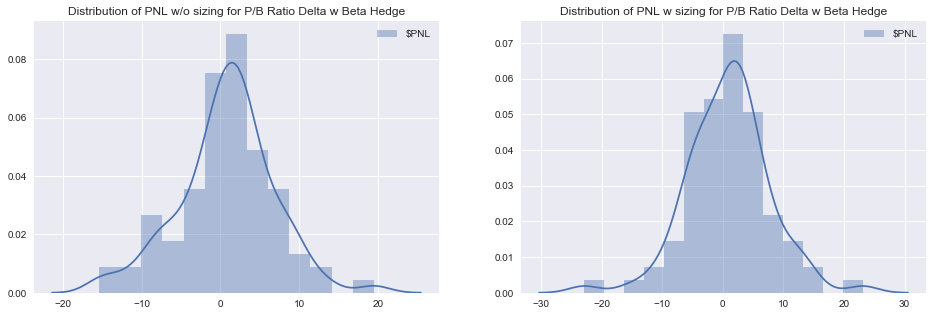

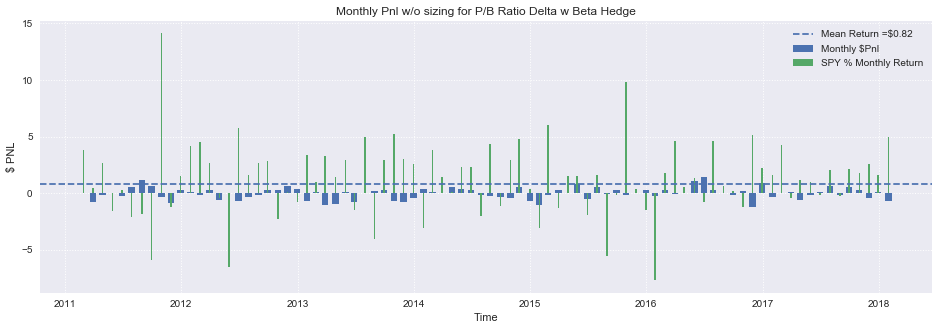

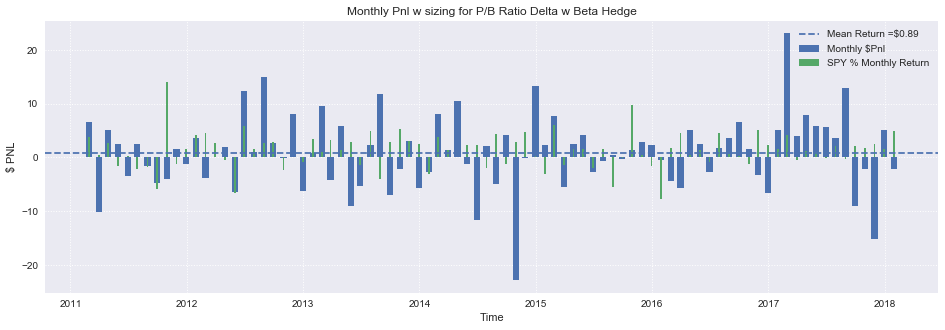

In [839]:
get_graph_beta(o2,o2_s,"P/B Ratio Delta w Beta Hedge")

###  D/E Ratio Delta w Beta Hedge

=======================Without sizing effect=======================

Total $PNL 2011-2018 :-21.44
Maximum $PNL in a month :18.60
Maximum $Loss in a month :-42.54

=======================With sizing effect=======================

Total $PNL 2011-2018 :-23.13
Maximum $PNL in a month :21.36
Maximum $Loss in a month :-33.50


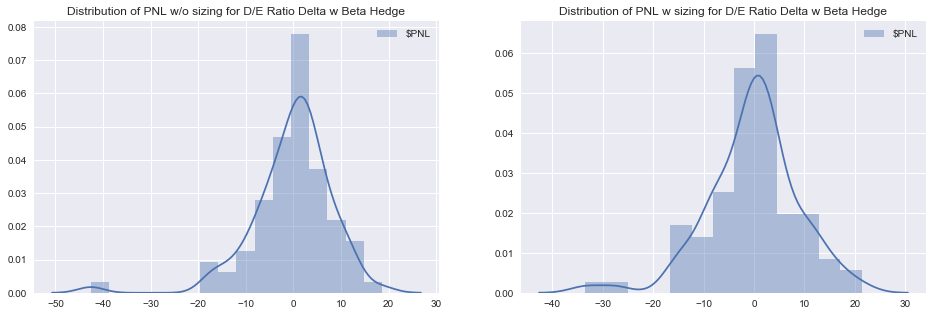

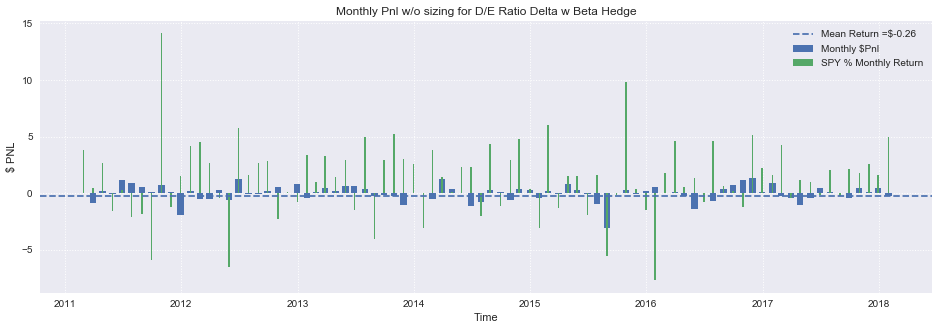

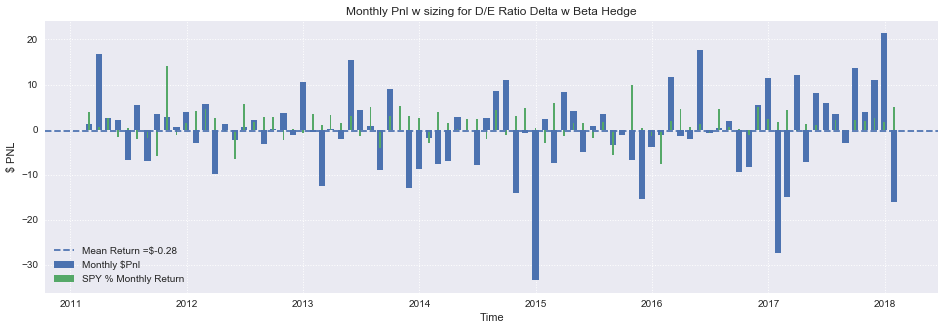

In [840]:
get_graph_beta(o3,o3_s,"D/E Ratio Delta w Beta Hedge")

###  P/E + P/B Combined Ratio Delta w Beta Hedge

=======================Without sizing effect=======================

Total $PNL 2011-2018 :31.24
Maximum $PNL in a month :29.03
Maximum $Loss in a month :-15.26

=======================With sizing effect=======================

Total $PNL 2011-2018 :68.04
Maximum $PNL in a month :26.92
Maximum $Loss in a month :-14.25


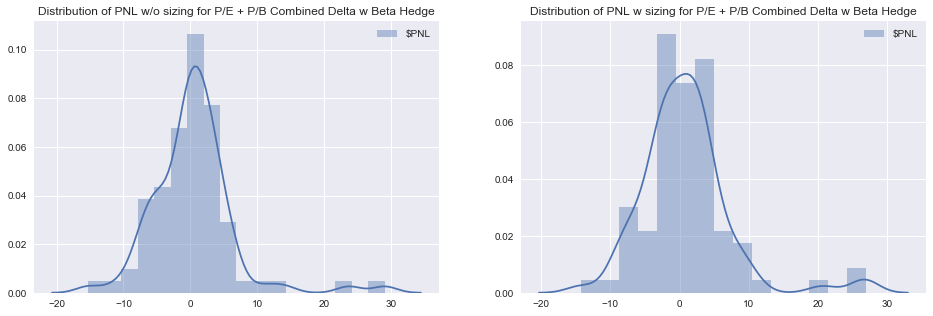

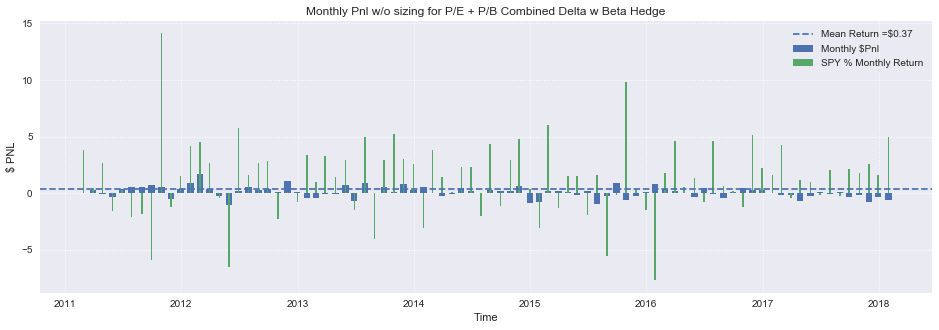

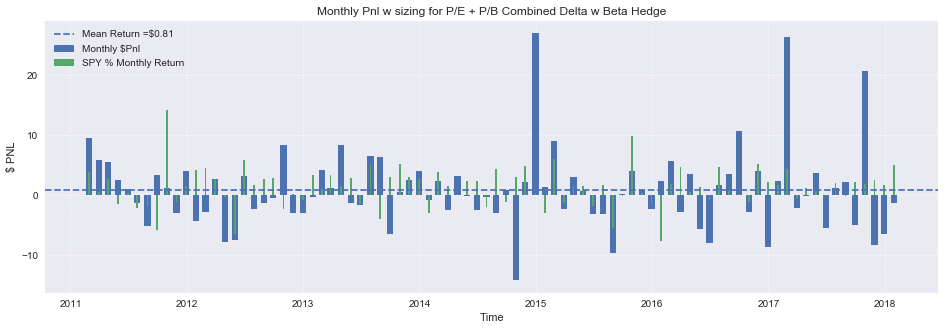

In [841]:
get_graph_beta(o4,o4_s,"P/E + P/B Combined Delta w Beta Hedge")

### Summary
    1. We generally see using Ratio's Delta is a better way for Selection of Stock,  rather than the ratio's directly
    2. Overall P/B is the best ratio for selecting stock selection (delta and ratio itself)
    3. While Beta Hedge may reduce the Risk, it also reduces the overall PNL
    4. Sizing effect overall increases the Profitability